# - The project :: I Sloan  Sky Survey DR14-Project
*****************************************************************
<img src="images/project.jpg" />


* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src="images/Space.jpg" />


* Domain-Knowledge ::
    * "The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar."30% used in testing and 70% in training.

* Overview of Data

* Labels

    * So what exactly are stars, galaxies, and quasars? Had you asked me prior to starting this project, I would’ve not been able to answer (shame on me). Fortunately, Faraz’s notebook succinctly summarises what they are:

    * A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.

    * A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.

    * A QUASAR, also known as quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. The most powerful quasars have luminosities exceeding 1041 watts, thousands of times greater than an ordinary large galaxy such as the Milky Way.

        
<img src="images/sp.gif" />

    



* Importing requried liberaries and Frameworks  ::

In [1]:
# Importing Liberaries and Framworks ::
import numpy     as np      # Apply Linear_Algebra operations and deal with arrays.
import pandas    as pd      # For Loading diff formats of data and Apply Wrangling and Mainpulating on data
import seaborn   as sns     # For Visualizing data
import warnings  as w       # For Ignoring any Warning
import missingno as mno     # Presnt Precentage of Nan Values
import datasist  as ds      # For Apply EDA and Visualization Using Simple Implementation
import matplotlib.pyplot as plt # For Set Plots , Charts and Maps Labels and Title  
import pandas_profiling  as pp  # To get describtion file of data


* Set some instructions

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)

In [3]:
# Loading dataset ::
df = pd.read_csv("Skyserver.csv")
df

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

* from thae result above we can see that ::
*********************************************************
* We have 10000  record of data.
* we have 18 features related Income.
* Our-Target Sloan-Sky-Survey-Class.

*******************************************************
# Features of Sloan  Sky Survey data :
*******************************************************

* The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

* To ease your start with the data you can read the feature descriptions below:

     * View "PhotoObj"
     * objid = Object Identifier
     * ra = J2000 Right Ascension (r-band)
     * dec = J2000 Declination (r-band)
     * Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial      * equator from the Sun at the March equinox to the hour circle of the point above the earth in * question. When paired with declination (abbreviated dec), these astronomical coordinates specify the       * direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.
  
*******************************
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit


********************************************
* run = Run Number
* rereun = Rerun Number
* camcol = Camera column
* field = Field number

***************************************

* Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

    * run number, which identifies the specific scan,
    * the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
    * the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
    * An additional number, rerun, specifies how the image was processed.
    
********************************************

* View "SpecObj"
***************************************
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object)
****************************************
* The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.
***********************************

* redshift = Final Redshift
* plate = plate number
* mjd = MJD of observation
* fiberid = fiber ID
**********************************
* In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

* Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

* Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

* The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
*******************************
 *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

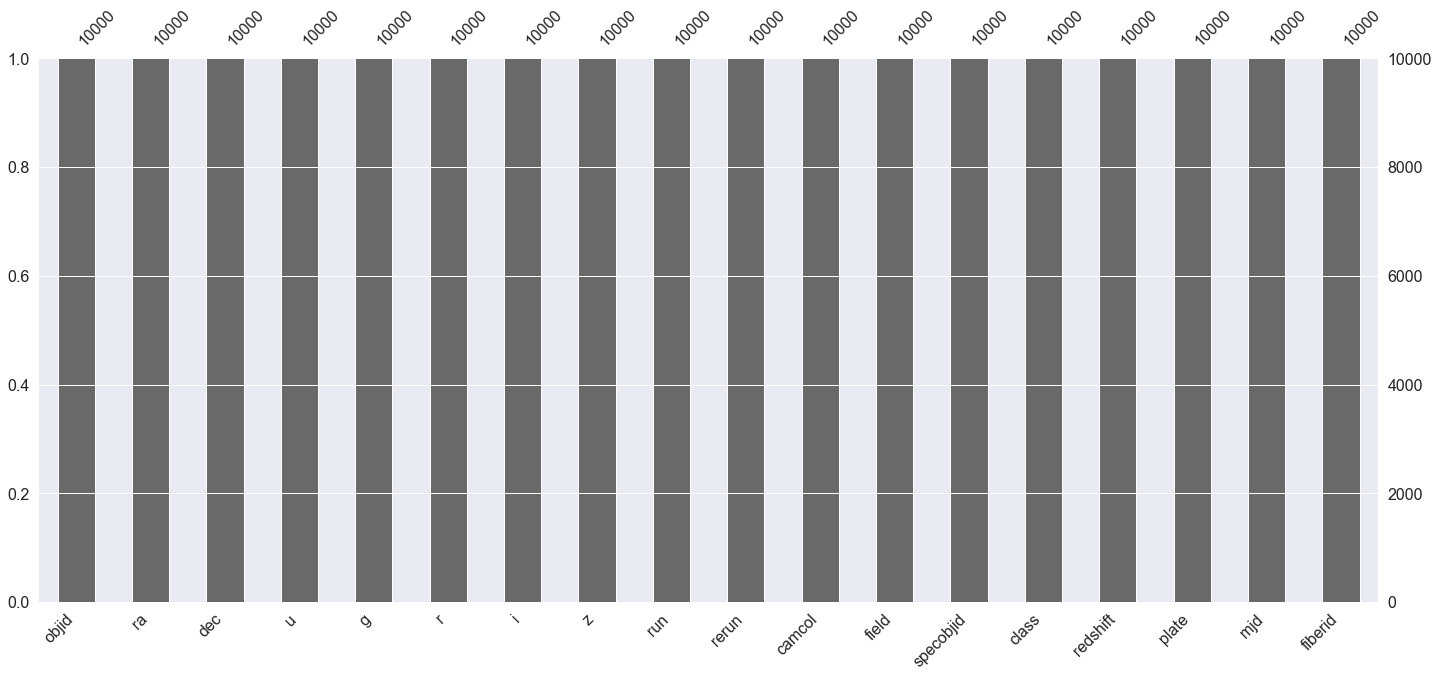

In [7]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

In [8]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [9]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (objid)

The Col _ (objid) _Unique_values :: [1.23765e+18]

The Col _ (objid)_Value_counts :: 

1.237650e+18    10000
Name: objid, dtype: int64

-----------
-----------

The Col :: (ra)

The Col _ (ra) _Unique_values :: [183.5313257 183.5983705 183.6802074 ... 131.5525623 131.4771511
 131.6650121]

The Col _ (ra)_Value_counts :: 

242.844196    1
187.152936    1
183.128479    1
122.117611    1
222.392751    1
             ..
223.520914    1
185.551316    1
157.234361    1
191.900624    1
239.944971    1
Name: ra, Length: 10000, dtype: int64

-----------
-----------

The Col :: (dec)

The Col _ (dec) _Unique_values :: [ 0.08969303  0.13528503  0.12618509 ... 51.66698638 51.75306779
 51.80530747]

The Col _ (dec)_Value_counts :: 

-0.980032     1
 1.068823     1
 0.671442     1
-1.433766     1
 64.007864    1
             ..
-1.808774     1
 61.353390    1
-1.087122     1
-0.114438     1
 0.000113     1
Name: dec, Length: 10000, dtype: int64

-----------
-----------

The Col :

In [10]:
# Present the Statistical Analysis describtion of Numerical_data ::
df.describe(include=["number"])

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

In [11]:
# present the Statistical Analysis description of Categorical_data ::
df.describe(include="object")

class
count    10000
unique       3
top     GALAXY
freq      4998

In [12]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [13]:
# check data include duplicates record or not
df.duplicated().sum()

0

In [14]:
# Droping All repeat or Redendant data.
df.drop_duplicates(inplace=True)

In [15]:
# check data include duplicates record or not
df.duplicated().sum()

0

In [16]:
# Checking dtypes of dataset.
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

* Wrangling and Mainplluting data.

In [17]:
# Get The Record Of the Clients who max objid ::
df[df["objid"] == df["objid"].max()]

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

In [18]:
# Get The Record of the Min objid ::
df[df["objid"] == df["objid"].min()]

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

In [19]:
# Get The Record Of the Clients who max ra ::
df[df["ra"] == df["ra"].max()]

objid          ra        dec         u         g         r  \
9529  1.237650e+18  260.884382  25.807214  18.01981  16.34242  15.63478   

             i         z   run  rerun  camcol  field     specobjid class  \
9529  15.32526  15.17147  1345    301       1    768  2.456770e+18  STAR   

      redshift  plate    mjd  fiberid  
9529 -0.000978   2182  53905      207

In [20]:
# Get The Record of the Min ra ::
df[df["ra"] == df["ra"].min()]

objid      ra        dec         u         g         r        i  \
3711  1.237650e+18  8.2351  14.704008  17.26167  16.06334  15.51514  15.2914   

             z   run  rerun  camcol  field     specobjid class  redshift  \
3711  15.16316  1035    301       3     18  3.600680e+18  STAR -0.000808   

      plate    mjd  fiberid  
3711   3198  54865      191

In [21]:
# Get The Record Of the Clients who max dec ::
df[df["dec"] == df["dec"].max()]

objid          ra        dec         u         g         r  \
6298  1.237650e+18  184.866297  68.542265  18.73973  17.19148  16.31186   

             i         z   run  rerun  camcol  field     specobjid   class  \
6298  15.89451  15.59012  1350    301       6    369  5.552350e+17  GALAXY   

      redshift  plate    mjd  fiberid  
6298  0.119523    493  51957      604

In [22]:
# Get The Record of the Min dec ::
df[df["dec"] == df["dec"].min()]

objid         ra       dec         u         g         r  \
1485  1.237650e+18  54.706321 -5.382632  16.48443  15.40966  15.11532   

             i         z   run  rerun  camcol  field     specobjid class  \
1485  15.02317  15.00822  1045    301       6    139  2.308190e+18  STAR   

      redshift  plate    mjd  fiberid  
1485  0.000349   2050  53401      364

In [23]:
# Get The Record Of the Clients who max u ::
df[df["u"] == df["u"].max()]

objid          ra        dec        u         g         r  \
6314  1.237650e+18  190.691932  68.431818  19.5999  17.75386  16.77506   

             i         z   run  rerun  camcol  field     specobjid   class  \
6314  16.37504  16.04082  1350    301       6    383  5.563610e+17  GALAXY   

      redshift  plate    mjd  fiberid  
6314  0.115527    494  51915      604

In [24]:
# Get The Record of the Min u ::
df[df["u"] == df["u"].min()]

objid          ra       dec         u         g         r  \
6210  1.237650e+18  193.274188 -3.507215  12.98897  13.71016  13.31439   

             i        z   run  rerun  camcol  field     specobjid class  \
6210  13.24723  12.7359  1140    301       1    269  3.794550e+17  STAR   

      redshift  plate    mjd  fiberid  
6210  0.000133    337  51997       98

In [25]:
# Get The Record Of the Clients who max g ::
df[df["g"] == df["g"].max()]

objid          ra       dec         u         g         r  \
8339  1.237650e+18  194.967387 -1.758097  19.57481  19.91897  20.40727   

             i         z   run  rerun  camcol  field     specobjid class  \
8339  20.79391  20.34419  1140    301       5    281  3.807050e+17  STAR   

      redshift  plate    mjd  fiberid  
8339  0.000299    338  51694      549

In [26]:
# Get The Record of the Min g ::
df[df["g"] == df["g"].min()]

objid          ra        dec         u         g         r  \
4248  1.237650e+18  225.075025  59.945382  13.99371  12.79955  12.48238   

             i         z   run  rerun  camcol  field     specobjid class  \
4248  15.14665  12.60718  1345    301       6    488  6.879930e+17  STAR   

      redshift  plate    mjd  fiberid  
4248 -0.000104    611  52055      248

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [28]:
# Get The Record Of the Clients who max run ::
df[df["run"] == df["run"].max()]

objid          ra        dec         u         g         r  \
6315  1.237650e+18  189.062546  66.821612  18.51454  16.51536  15.57081   
6316  1.237650e+18  189.243662  66.972679  19.42457  17.66490  16.75660   
6317  1.237650e+18  189.310978  67.010977  18.45356  17.06661  16.46738   
6318  1.237650e+18  189.314899  66.894665  19.35270  17.82206  16.87237   
6319  1.237650e+18  190.632849  66.948237  18.89520  17.66535  17.12782   
...            ...         ...        ...       ...       ...       ...   
9718  1.237650e+18  206.866890  66.238422  19.21339  18.34266  18.05851   
9719  1.237650e+18  206.845387  66.199436  17.92836  16.83399  16.37704   
9720  1.237650e+18  206.875214  66.182530  18.96706  17.31938  16.62487   
9721  1.237650e+18  206.940622  66.203248  18.15461  16.90779  16.48640   
9722  1.237650e+18  206.990836  66.171612  19.03971  17.60888  16.39753   

             i         z   run  rerun  camcol  field     specobjid   class  \
6315  15.14489  14.78371  1412    301       2    180  8.016470e+18  GALAXY   
6316  16.32211  15.97918  1412    301       2    180  5.562230e+17  GALAXY   
6317  16.11402  15.98683  1412    301       2    180  5.562230e+17  GALAXY   
6318  16.42537  16.13884  1412    301       2    180  5.562250e+17  GALAXY   
6319  16.78353  16.59278  1412    301       2    184  5.562030e+17  GALAXY   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9718  17.93231  17.93448  1412    301       4    227  7.865690e+18    STAR   
9719  16.17708  16.08713  1412    301       4    227  3.709940e+18    STAR   
9720  16.34805  16.19908  1412    301       4    227  3.709940e+18    STAR   
9721  16.32065  16.26704  1412    301       4    227  3.709940e+18    STAR   
9722  16.16883  16.07118  1412    301       4    227  5.597060e+17    STAR   

      redshift  plate    mjd  fiberid  
6315  0.088848   7120  56720      240  
6316  0.092210    494  51915      103  
6317  0.061118    494  51915      104  
6318  0.169736    494  51915      109  
6319  0.103971    494  51915       30  
...        ...    ...    ...      ...  
9718 -0.000649   6986  56717      552  
9719 -0.000053   3295  54924      371  
9720 -0.000342   3295  54924      375  
9721 -0.000071   3295  54924      367  
9722 -0.000360    497  51989      487  

[347 rows x 18 columns]

In [29]:
# Get The Record of the Min run ::
df[df["run"] == df["run"].min()]

objid          ra       dec         u         g         r  \
199  1.237650e+18  121.820752  0.931990  19.37035  17.34262  16.35286   
200  1.237650e+18  122.087900  0.843147  19.05249  17.03777  16.07633   
201  1.237650e+18  122.863995  0.896151  18.20631  16.89692  16.46658   
202  1.237650e+18  122.981945  0.963857  17.63113  16.55926  16.24861   
203  1.237650e+18  122.988638  0.973743  15.99172  14.98865  14.70003   
204  1.237650e+18  122.935635  0.899086  19.37706  18.44093  18.24528   
205  1.237650e+18  123.039386  0.930070  16.73877  15.68268  15.43654   
206  1.237650e+18  123.020264  0.911875  16.37119  15.28426  15.05225   
207  1.237650e+18  123.016535  0.848145  19.52481  18.21796  17.68045   
208  1.237650e+18  123.202500  0.905130  18.65220  17.52927  17.53732   
209  1.237650e+18  123.267895  0.960993  16.63293  15.27509  14.61367   
210  1.237650e+18  123.348807  0.922524  16.14538  15.07947  14.84144   
211  1.237650e+18  123.426130  0.881884  17.84565  16.82412  16.49827   
212  1.237650e+18  123.587960  0.919739  17.75484  16.59773  16.53687   
213  1.237650e+18  123.545268  0.931392  19.36230  18.19180  17.81977   
214  1.237650e+18  123.612777  0.948787  18.97095  17.07911  16.13754   
215  1.237650e+18  123.673560  0.861349  16.48326  15.04494  15.04021   
216  1.237650e+18  123.743042  1.006399  18.98689  17.09758  16.18773   
217  1.237650e+18  110.070039  1.218735  19.42591  18.42443  18.00135   
218  1.237650e+18  110.246454  1.364872  18.58476  17.29450  16.42206   
219  1.237650e+18  110.275373  1.407070  19.44881  17.06147  16.09691   
220  1.237650e+18  110.273031  1.424807  19.58554  17.76914  16.91808   
221  1.237650e+18  110.455531  1.254180  19.58684  17.73149  16.96642   
222  1.237650e+18  110.469850  1.228435  19.42571  17.78678  17.11364   
223  1.237650e+18  110.730700  1.289661  18.36269  16.79013  16.16286   
224  1.237650e+18  119.822103  1.324423  19.11461  17.11108  16.35578   
225  1.237650e+18  119.997297  1.295619  19.25602  17.75220  17.28004   
226  1.237650e+18  120.124148  1.311373  18.68312  16.80078  16.12189   
227  1.237650e+18  120.194987  1.339232  19.13375  17.84091  17.37001   
228  1.237650e+18  120.298071  1.359266  19.41101  17.17151  16.17792   
229  1.237650e+18  120.547819  1.281227  19.17278  17.30439  16.63581   

            i         z  run  rerun  camcol  field     specobjid   class  \
199  15.92400  15.58903  308    301       5    104  5.342660e+18  GALAXY   
200  15.63148  15.31245  308    301       5    105  5.342400e+18  GALAXY   
201  16.31574  16.28902  308    301       5    110  2.316070e+18    STAR   
202  16.14775  16.13221  308    301       5    111  2.338580e+18    STAR   
203  14.64919  14.50626  308    301       5    111  2.316070e+18    STAR   
204  18.19469  18.17668  308    301       5    111  2.338580e+18    STAR   
205  15.38572  15.40208  308    301       5    112  2.316070e+18    STAR   
206  14.98734  15.01140  308    301       5    112  2.316070e+18    STAR   
207  17.46177  17.37293  308    301       5    112  2.316070e+18    STAR   
208  17.58253  17.67018  308    301       5    113  2.316080e+18    STAR   
209  14.50841  14.27292  308    301       5    113  2.316090e+18    STAR   
210  14.77282  14.78681  308    301       5    114  2.316080e+18    STAR   
211  16.38742  16.35545  308    301       5    114  2.316080e+18    STAR   
212  16.56253  16.61154  308    301       5    115  2.316080e+18    STAR   
213  17.69313  17.61249  308    301       5    115  1.293810e+18    STAR   
214  15.65789  15.34548  308    301       5    115  5.391050e+18  GALAXY   
215  14.29518  14.18345  308    301       5    116  2.316100e+18    STAR   
216  15.73230  15.46169  308    301       5    116  5.391050e+18  GALAXY   
217  17.79079  17.70945  308    301       6     25  8.388150e+18    STAR   
218  16.27426  15.89856  308    301       6     26  8.388170e+18    STAR   
219  15.75754  15.58153  308    301       6     26  8.388170e+18    STAR   
220

In [30]:
# Get The Record Of the Clients who max rerun ::
df[df["rerun"] == df["rerun"].max()]

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

In [31]:
# Get The Record of the Min rerun ::
df[df["rerun"] == df["rerun"].min()]

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

In [32]:
# Get The Record Of the Clients who max camcolg ::
df[df["camcol"] == df["camcol"].max()]

objid          ra        dec         u         g         r  \
217   1.237650e+18  110.070039   1.218735  19.42591  18.42443  18.00135   
218   1.237650e+18  110.246454   1.364872  18.58476  17.29450  16.42206   
219   1.237650e+18  110.275373   1.407070  19.44881  17.06147  16.09691   
220   1.237650e+18  110.273031   1.424807  19.58554  17.76914  16.91808   
221   1.237650e+18  110.455531   1.254180  19.58684  17.73149  16.96642   
...            ...         ...        ...       ...       ...       ...   
9911  1.237650e+18  212.671143  66.075293  19.27164  18.10828  17.50667   
9912  1.237650e+18  212.597531  65.892684  18.43914  17.42656  17.18000   
9913  1.237650e+18  213.006328  66.026310  18.26580  17.32373  17.01765   
9914  1.237650e+18  213.107613  65.790016  18.08235  17.09783  16.93975   
9915  1.237650e+18  213.473124  65.805781  17.13538  15.27561  14.44825   

             i         z   run  rerun  camcol  field     specobjid   class  \
217   17.79079  17.70945   308    301       6     25  8.388150e+18    STAR   
218   16.27426  15.89856   308    301       6     26  8.388170e+18    STAR   
219   15.75754  15.58153   308    301       6     26  8.388170e+18    STAR   
220   16.55439  16.34465   308    301       6     26  8.388170e+18    STAR   
221   16.67645  16.49140   308    301       6     28  8.388180e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9911  17.09328  16.89209  1350    301       6    442  5.608520e+17  GALAXY   
9912  16.98919  16.85274  1350    301       6    442  5.608540e+17  GALAXY   
9913  16.91126  16.91304  1350    301       6    443  5.608570e+17    STAR   
9914  16.92200  16.92979  1350    301       6    444  5.608570e+17    STAR   
9915  14.05831  13.73364  1350    301       6    445  5.608630e+17  GALAXY   

      redshift  plate    mjd  fiberid  
217   0.000104   7450  56722      705  
218   0.000391   7450  56722      786  
219   0.000127   7450  56722      782  
220   0.000092   7450  56722      781  
221   0.000346   7450  56722      829  
...        ...    ...    ...      ...  
9911  0.067402    498  51984      561  
9912  0.045250    498  51984      566  
9913 -0.000270    498  51984      576  
9914 -0.000703    498  51984      577  
9915  0.031951    498  51984      601  

[1769 rows x 18 columns]

In [33]:
# Get The Record of the Min camcol ::
df[df["camcol"] == df["camcol"].min()]

objid          ra        dec         u         g         r  \
99    1.237650e+18  161.073790  -0.892740  19.11236  17.92701  17.42347   
100   1.237650e+18  161.024472  -0.962380  18.86752  17.33773  16.80683   
101   1.237650e+18  161.194123  -1.023624  18.95785  18.08318  17.78178   
102   1.237650e+18  161.238814  -0.840751  17.80041  16.46003  15.90095   
103   1.237650e+18  161.248030  -0.958167  18.76266  17.25724  16.68513   
...            ...         ...        ...       ...       ...       ...   
9529  1.237650e+18  260.884382  25.807214  18.01981  16.34242  15.63478   
9916  1.237650e+18  255.859128  65.672204  19.19714  17.97623  17.33476   
9917  1.237650e+18  255.504262  65.530268  19.34695  17.66396  17.06401   
9918  1.237650e+18  255.793545  65.571398  17.94622  16.86961  16.58066   
9919  1.237650e+18  255.919785  65.565210  18.01696  16.12407  15.18910   

             i         z   run  rerun  camcol  field     specobjid   class  \
99    17.08680  16.83476   756    301       1    302  3.096810e+17  GALAXY   
100   16.55789  16.38996   756    301       1    302  3.096900e+17  GALAXY   
101   17.65689  17.61821   756    301       1    303  2.881250e+18    STAR   
102   15.66963  15.53772   756    301       1    303  2.881260e+18    STAR   
103   16.47563  16.38993   756    301       1    303  2.881250e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9529  15.32526  15.17147  1345    301       1    768  2.456770e+18    STAR   
9916  16.93664  16.68953  1356    301       1     20  3.941580e+17  GALAXY   
9917  16.86074  16.71845  1356    301       1     20  3.941580e+17    STAR   
9918  16.39281  16.31302  1356    301       1     20  3.941580e+17  GALAXY   
9919  14.73095  14.39731  1356    301       1     21  3.941540e+17  GALAXY   

      redshift  plate    mjd  fiberid  
99    0.038694    275  51910      211  
100   0.026556    275  51910      245  
101   0.000889   2559  54208      256  
102   0.000386   2559  54208      298  
103   0.000184   2559  54208      260  
...        ...    ...    ...      ...  
9529 -0.000978   2182  53905      207  
9916  0.130693    350  51691      339  
9917 -0.000425    350  51691      338  
9918  0.026339    350  51691      337  
9919  0.078698    350  51691      323  

[1298 rows x 18 columns]

In [34]:
# Get The Record Of the Clients who max field ::
df[df["field"] == df["field"].max()]

objid          ra        dec         u         g         r  \
9527  1.237650e+18  260.811189  25.901190  15.61899  14.27158  14.27142   
9528  1.237650e+18  260.850897  25.839687  17.95774  16.76071  16.23790   
9529  1.237650e+18  260.884382  25.807214  18.01981  16.34242  15.63478   

             i         z   run  rerun  camcol  field     specobjid class  \
9527  14.35111  14.41837  1345    301       1    768  2.456780e+18  STAR   
9528  16.00827  15.87275  1345    301       1    768  2.456770e+18  STAR   
9529  15.32526  15.17147  1345    301       1    768  2.456770e+18  STAR   

      redshift  plate    mjd  fiberid  
9527  0.000071   2182  53905      244  
9528 -0.000940   2182  53905      204  
9529 -0.000978   2182  53905      207

In [35]:
# Get The Record of the Min field ::
df[df["field"] == df["field"].min()]

objid          ra       dec         u         g         r  \
2535  1.237650e+18  170.881867 -1.472093  17.41070  16.43608  16.17066   
2536  1.237650e+18  170.906732 -1.569522  17.61632  16.38015  15.94872   
2537  1.237650e+18  170.896664 -1.565652  16.09008  14.91449  14.32554   
2716  1.237650e+18  198.246081 -0.482206  17.86578  16.48910  15.99167   
2717  1.237650e+18  198.252758 -0.605942  18.28032  16.29778  15.50957   
2718  1.237650e+18  198.349306 -0.472409  17.57337  15.96870  15.38183   
2719  1.237650e+18  198.363263 -0.559207  18.15904  17.22439  16.85924   
2720  1.237650e+18  198.273606 -0.594685  17.99148  16.52407  16.08967   
2721  1.237650e+18  198.340646 -0.490493  19.12321  18.00012  17.57241   
3674  1.237650e+18  198.237677 -0.063786  18.12452  16.31704  15.51723   
3675  1.237650e+18  198.263156  0.000844  19.10824  18.06115  17.99554   
3676  1.237650e+18  198.334273 -0.083610  17.67441  16.42336  16.53885   
3677  1.237650e+18  198.355280 -0.044145  16.51499  15.58410  15.28914   
3678  1.237650e+18  198.354211 -0.075474  18.76880  17.30682  16.60254   
4824  1.237650e+18  198.255665  0.233299  16.89502  15.49145  14.98841   
4825  1.237650e+18  198.316150  0.279061  18.65875  17.75414  17.52334   
4826  1.237650e+18  198.311150  0.273881  18.76165  17.66175  17.22069   
4827  1.237650e+18  198.351098  0.250818  19.09828  17.96327  17.52497   
5639  1.237650e+18  200.577756  1.216878  17.86177  16.90443  16.53017   
5640  1.237650e+18  200.623790  1.216531  17.51142  16.36962  15.89902   
5641  1.237650e+18  200.538872  1.104460  18.99998  17.05362  16.14475   
5642  1.237650e+18  200.616352  1.170636  19.05459  18.01537  17.66486   
5643  1.237650e+18  200.661128  1.175639  19.05897  17.04826  16.02883   
5644  1.237650e+18  200.667556  1.198347  19.41665  17.71199  17.01630   

             i         z   run  rerun  camcol  field     specobjid   class  \
2535  16.05644  16.01919  1231    301       6     11  3.671360e+17    STAR   
2536  15.78003  15.71770  1231    301       6     11  3.640110e+18    STAR   
2537  13.91501  13.64964  1231    301       6     11  3.671350e+17  GALAXY   
2716  15.83048  15.78119  1334    301       2     11  8.394770e+18    STAR   
2717  15.20541  15.05962  1334    301       2     11  3.266280e+18    STAR   
2718  15.19041  15.11510  1334    301       2     11  3.266280e+18    STAR   
2719  16.72534  16.68508  1334    301       2     11  8.394760e+18    STAR   
2720  15.78902  15.62116  1334    301       2     11  3.321930e+17  GALAXY   
2721  17.38683  17.30118  1334    301       2     11  3.321950e+17    STAR   
3674  15.17978  14.98545  1334    301       3     11  3.294430e+18    STAR   
3675  18.03827  18.00772  1334    301       3     11  8.394770e+18    STAR   
3676  16.64167  16.72885  1334    301       3     11  8.394770e+18    STAR   
3677  15.15953  15.15055  1334    301       3     11  3.266280e+18    STAR   
3678  16.19267  15.91498  1334    301       3     11  3.322720e+17  GALAXY   
4824  14.82459  14.76979  1334    301       4     11  3.266370e+18    STAR   
4825  17.45224  17.45508  1334    301       4     11  8.394930e+18    STAR   
4826  16.96040  16.74412  1334    301       4     11  3.322700e+17  GALAXY   
4827  17.27575  17.14677  1334    301       4     11  3.322680e+17  GALAXY   
5639  16.37989  16.31607  1404    301       6     11  3.723500e+18    STAR   
5640  15.70393  15.62221  1404    301       6     11  3.723500e+18    STAR   
5641  15.71236  15.38618  1404    301       6     11  3.334110e+17  GALAXY   
5642  17.52001  17.47378  1404    301       6     11  5.922470e+17    STAR   
5643  15.58469  15.25831  1404    301       6     11  3.344850e+17  GALAXY   
5644  16.71243  16.56122  1404    301       6     11  3.723490e+18    STAR   

      redshift  plate    mjd  fiberid  
2535  0.000163    326  52375      337  
2536  0.000085   3233  54891      289  
2537  0.044631    326  52375      332  
2716  0.000132   7456  56727      223  
2717 -0.000

In [36]:
# Get The Record Of the Clients who max specobjid ::
df[df["specobjid"] == df["specobjid"].max()]

objid          ra       dec         u        g         r  \
5404  1.237650e+18  239.662431  49.86358  19.07924  18.1054  17.76257   

             i         z   run  rerun  camcol  field     specobjid class  \
5404  17.64778  17.58385  1345    301       1    574  9.468830e+18  STAR   

      redshift  plate    mjd  fiberid  
5404 -0.000371   8410  57481       57

In [37]:
# Get The Record of the Min specobjid ::
df[df["specobjid"] == df["specobjid"].min()]

objid          ra       dec         u         g       r  \
1207  1.237650e+18  145.541171  0.795448  19.55193  18.33518  17.737   

             i         z  run  rerun  camcol  field     specobjid   class  \
1207  17.40774  17.24087  756    301       5    198  2.995780e+17  GALAXY   

      redshift  plate    mjd  fiberid  
1207  0.098886    266  51630      323

In [38]:
# Get The Record Of the Clients who max redshift ::
df[df["redshift"] == df["redshift"].max()]

objid          ra       dec         u         g         r  \
3479  1.237650e+18  173.357833 -1.474741  17.35156  17.37521  17.60592   

             i         z   run  rerun  camcol  field     specobjid class  \
3479  17.79112  17.96544  1231    301       6     27  4.323560e+18   QSO   

      redshift  plate    mjd  fiberid  
3479  5.353854   3840  55574      365

In [39]:
# Get The Record of the Min redshift ::
df[df["redshift"] == df["redshift"].min()]

objid          ra       dec         u         g         r  \
6574  1.237650e+18  188.422213 -1.739926  19.08743  18.59100  18.31002   
6715  1.237650e+18  200.098622  0.268668  19.20443  19.10505  19.21146   

             i         z   run  rerun  camcol  field     specobjid class  \
6574  18.06940  17.87447  1140    301       5    237  4.269420e+18  STAR   
6715  19.35759  19.61090  1334    301       4     23  4.560030e+18  STAR   

      redshift  plate    mjd  fiberid  
6574 -0.004136   3792  55212       20  
6715 -0.004136   4050  55599      504

In [40]:
# Get The Record Of the Clients who max plate ::
df[df["plate"] == df["plate"].max()]

objid          ra       dec         u        g         r  \
5404  1.237650e+18  239.662431  49.86358  19.07924  18.1054  17.76257   

             i         z   run  rerun  camcol  field     specobjid class  \
5404  17.64778  17.58385  1345    301       1    574  9.468830e+18  STAR   

      redshift  plate    mjd  fiberid  
5404 -0.000371   8410  57481       57

In [41]:
# Get The Record of the Min plate ::
df[df["plate"] == df["plate"].min()]

objid          ra       dec         u         g         r  \
595   1.237650e+18  145.288577  0.346512  19.22352  18.00232  17.37943   
596   1.237650e+18  145.292821  0.376326  19.31302  18.13527  17.67289   
597   1.237650e+18  145.593807  0.278308  19.10790  18.92201  18.59314   
598   1.237650e+18  145.637275  0.373311  19.20753  17.87736  17.30583   
599   1.237650e+18  145.594013  0.309420  19.13766  17.23995  16.29899   
600   1.237650e+18  145.765233  0.300217  17.94163  16.54377  15.98770   
601   1.237650e+18  145.775122  0.320238  18.38335  17.32703  17.39917   
602   1.237650e+18  145.800180  0.414172  17.17863  15.42035  14.50936   
603   1.237650e+18  145.826544  0.373110  19.20228  17.71483  17.07567   
605   1.237650e+18  146.084663  0.257263  19.15385  17.74926  17.14627   
608   1.237650e+18  146.785946  0.283566  18.26100  17.10950  16.60116   
609   1.237650e+18  146.876925  0.361582  18.85666  17.66109  17.03763   
610   1.237650e+18  146.887742  0.217454  19.52121  17.74410  16.88671   
611   1.237650e+18  146.957656  0.393353  18.62672  17.24185  16.66062   
613   1.237650e+18  147.192888  0.271933  16.63782  15.67488  15.26671   
614   1.237650e+18  147.128310  0.369214  18.33496  16.86486  16.12504   
615   1.237650e+18  147.150583  0.416565  18.54785  16.89020  16.04284   
616   1.237650e+18  147.238829  0.373755  18.93610  18.59122  18.42903   
617   1.237650e+18  147.305557  0.217659  18.36063  17.22968  16.69767   
619   1.237650e+18  147.326756  0.245530  18.68131  17.26695  16.54334   
1205  1.237650e+18  145.320932  0.771111  18.86915  17.73447  17.25329   
1207  1.237650e+18  145.541171  0.795448  19.55193  18.33518  17.73700   
1208  1.237650e+18  145.847485  0.675747  18.77625  16.94780  16.03059   
1209  1.237650e+18  145.969659  0.830928  19.37867  17.44197  16.49375   
1211  1.237650e+18  145.992635  0.788073  18.71960  17.22156  16.41532   
1212  1.237650e+18  146.020908  0.733552  17.41963  15.34520  14.35107   
1213  1.237650e+18  146.012245  0.765634  18.79792  17.73394  17.19519   
1214  1.237650e+18  146.016870  0.716796  19.26690  17.30498  16.34389   
1217  1.237650e+18  146.462979  0.638698  17.70856  16.44154  15.70594   
1218  1.237650e+18  146.497125  0.742417  18.74275  17.26978  16.62725   
1220  1.237650e+18  146.611264  0.693047  19.25579  18.12039  17.54475   
1221  1.237650e+18  146.799093  0.702693  16.70126  15.79634  15.40868   
1222  1.237650e+18  146.806815  0.665611  17.34683  15.63673  14.61840   
1223  1.237650e+18  146.842231  0.740821  18.98516  17.34394  16.56421   
1226  1.237650e+18  146.903804  0.632169  19.58055  17.88885  17.01648   
1227  1.237650e+18  147.021649  0.754460  17.86546  15.69004  14.62792   
7167  1.237650e+18  145.341221  0.547317  19.37221  17.78400  16.95729   
7169  1.237650e+18  145.813924  0.488514  18.95072  17.70836  17.12574   
7170  1.237650e+18  145.947802  0.465304  17.62630  15.93680  15.11596   
7171  1.237650e+18  145.928270  0.531145  18.34221  16.97888  16.35262   
7172  1.237650e+18  146.050972  0.440113  18.73520  17.50551  16.88299   
7175  1.237650e+18  147.167646  0.471699  19.44095  18.30838  18.26834   
7176  1.237650e+18  147.180091  0.429635  18.62233  16.76626  15.85853   
7177  1.237650e+18  147.179934  0.493022  19.13928  18.18612  17.82436   
7178  1.237650e+18  147.265340  0.465755  19.59912  18.20925  17.60017   

             i         z   run  rerun  camcol  field     specobjid   class  \
595   17.01110  16.76524   756    301       4    197  2.995880e+17  GALAXY   
596   17.49996  17.44187   756    301       4    197  2.995850e+17    STAR   
597   18.47573  18.40461   756    301       4    199  2.995980e+17     QSO   
598   17.08623  16.96132   756    301       4    199  2.995970e+17    STAR   
599   15.78274  15.38905   756    301       4    199  2.995950e+17  GALAXY   
600   15.77288  15.65827   756    301       4    200  2.996080e+17    STAR   
601   17.56194  17.59595   756    301       4    200  2.996100

In [42]:
# Get The Record Of the Clients who max mjd ::
df[df["mjd"] == df["mjd"].max()]

objid          ra       dec         u        g         r  \
5404  1.237650e+18  239.662431  49.86358  19.07924  18.1054  17.76257   

             i         z   run  rerun  camcol  field     specobjid class  \
5404  17.64778  17.58385  1345    301       1    574  9.468830e+18  STAR   

      redshift  plate    mjd  fiberid  
5404 -0.000371   8410  57481       57

In [43]:
# Get The Record of the Min mjd ::
df[df["mjd"] == df["mjd"].min()]

objid          ra      dec         u         g         r  \
4807  1.237650e+18  199.738921 -0.19831  17.27938  15.50455  14.64715   

             i         z   run  rerun  camcol  field     specobjid   class  \
4807  14.19163  13.79359  1334    301       3     21  3.333290e+17  GALAXY   

      redshift  plate    mjd  fiberid  
4807  0.053547    296  51578      226

In [44]:
# Get The Record Of the Clients who max fiberid ::
df[df["fiberid"] == df["fiberid"].max()]

objid         ra       dec         u         g         r  \
2907  1.237650e+18  156.29779  0.268638  18.91356  17.99653  17.71507   

             i         z  run  rerun  camcol  field     specobjid class  \
2907  17.59024  17.53243  756    301       4    270  4.313600e+18  STAR   

      redshift  plate    mjd  fiberid  
2907  0.000956   3831  55543     1000

In [45]:
# Get The Record of the Min fiberid ::
df[df["fiberid"] == df["fiberid"].min()]

objid          ra        dec         u         g         r  \
461   1.237650e+18  162.841123  -1.009335  19.36181  18.16825  17.62504   
467   1.237650e+18  163.063223  -0.964999  17.85959  16.18301  15.56699   
624   1.237650e+18  147.479828   0.323405  17.82232  16.77606  16.33072   
773   1.237650e+18  212.573868  -0.754618  19.20539  18.24311  18.00934   
1804  1.237650e+18  169.854381  -0.908331  19.42491  18.43935  18.13196   
5283  1.237650e+18  232.042728  -0.811830  18.87088  17.05433  16.02553   
5455  1.237650e+18  185.771087  -3.412493  19.02857  17.07970  16.18462   
5921  1.237650e+18  181.826841  -1.040704  17.07545  15.40911  14.80043   
6815  1.237650e+18  193.916057  -3.514723  15.15850  15.92086  16.26638   
6934  1.237650e+18  202.801259   1.141892  19.04291  17.14602  16.23861   
8824  1.237650e+18  208.452550   1.073793  19.16192  17.19698  16.15960   
9064  1.237650e+18  137.163083  55.722521  19.58160  17.86920  17.23096   

             i         z   run  rerun  camcol  field     specobjid   class  \
461   17.39792  17.29436   756    301       1    314  2.689780e+18    STAR   
467   15.37634  15.28177   756    301       1    315  2.881180e+18    STAR   
624   15.96423  15.79552   756    301       4    211  5.404320e+17  GALAXY   
773   17.90706  17.91481   752    301       2    461  3.400220e+17    STAR   
1804  17.87107  17.72758   756    301       1    361  3.141260e+17  GALAXY   
5283  15.49396  15.05167   752    301       2    591  3.524070e+17  GALAXY   
5455  15.75913  15.44696  1140    301       1    219  3.749250e+17  GALAXY   
5921  14.55950  14.47218   756    301       1    441  3.256100e+18    STAR   
6815  16.03305  15.61474  1140    301       1    274  3.794290e+17  GALAXY   
6934  15.74866  15.34848  1404    301       6     26  5.933500e+17  GALAXY   
8824  15.72448  15.35635  1404    301       6     63  5.967270e+17  GALAXY   
9064  16.98087  16.86108  1345    301       4    197  8.195430e+18    STAR   

      redshift  plate    mjd  fiberid  
461   0.000488   2389  54213        1  
467  -0.000051   2559  54208        1  
624   0.062622    480  51989        1  
773   0.000068    302  51688        1  
1804  0.050179    279  51984        1  
5283  0.088221    313  51673        1  
5455  0.071176    333  52313        1  
5921 -0.000093   2892  54552        1  
6815  0.434987    337  51997        1  
6934  0.059986    527  52342        1  
8824  0.115716    530  52026        1  
9064 -0.000076   7279  57071        1

In [46]:
# grouped data ased on class feature and get col describtion ::
df.groupby("class").describe().transpose()

class                GALAXY           QSO          STAR
objid   count  4.998000e+03  8.500000e+02  4.152000e+03
        mean   1.237650e+18  1.237650e+18  1.237650e+18
        std    1.108591e+05  2.126051e+04  9.165904e+04
        min    1.237650e+18  1.237650e+18  1.237650e+18
        25%    1.237650e+18  1.237650e+18  1.237650e+18
...                     ...           ...           ...
fiberid min    1.000000e+00  5.000000e+00  1.000000e+00
        25%    1.862500e+02  2.150000e+02  1.790000e+02
        50%    3.450000e+02  3.865000e+02  3.510000e+02
        75%    4.960000e+02  5.320000e+02  5.262500e+02
        max    9.940000e+02  9.800000e+02  1.000000e+03

[136 rows x 3 columns]

In [47]:
df.head(2)

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   

          z  run  rerun  camcol  field     specobjid class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18  STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17  STAR -0.000055    323   

     mjd  fiberid  
0  54922      491  
1  51615      541

In [48]:
Con_Matrix = df.corr()
Con_Matrix

objid        ra       dec         u         g         r         i  \
objid        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
ra           NaN  1.000000  0.003596  0.031238  0.043909  0.047103  0.045731   
dec          NaN  0.003596  1.000000  0.035279  0.061875  0.063404  0.058292   
u            NaN  0.031238  0.035279  1.000000  0.849232  0.692379  0.602630   
g            NaN  0.043909  0.061875  0.849232  1.000000  0.958106  0.907419   
r            NaN  0.047103  0.063404  0.692379  0.958106  1.000000  0.977672   
i            NaN  0.045731  0.058292  0.602630  0.907419  0.977672  1.000000   
z            NaN  0.042950  0.056870  0.551483  0.879622  0.969197  0.981507   
run          NaN -0.092741  0.778385  0.038229  0.058446  0.057261  0.049765   
rerun        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
camcol       NaN -0.006294  0.114614  0.009945  0.010223  0.010747  0.013461   
field        NaN  0.594700 -0.131471  0.008548  0.014651  0.017133  0.019781   
specobjid    NaN -0.095327  0.088345 -0.129429 -0.054979  0.019788  0.072960   
redshift     NaN  0.030307  0.067021  0.163741  0.407576  0.441080  0.431450   
plate        NaN -0.095329  0.088342 -0.129430 -0.054981  0.019787  0.072958   
mjd          NaN -0.086887  0.066147 -0.168793 -0.092772 -0.009345  0.050896   
fiberid      NaN  0.057485  0.155012  0.011301  0.047187  0.061081  0.069977   

                  z       run  rerun    camcol     field  specobjid  redshift  \
objid           NaN       NaN    NaN       NaN       NaN        NaN       NaN   
ra         0.042950 -0.092741    NaN -0.006294  0.594700  -0.095327  0.030307   
dec        0.056870  0.778385    NaN  0.114614 -0.131471   0.088345  0.067021   
u          0.551483  0.038229    NaN  0.009945  0.008548  -0.129429  0.163741   
g          0.879622  0.058446    NaN  0.010223  0.014651  -0.054979  0.407576   
r          0.969197  0.057261    NaN  0.010747  0.017133   0.019788  0.441080   
i          0.981507  0.049765    NaN  0.013461  0.019781   0.072960  0.431450   
z          1.000000  0.048252    NaN  0.010930  0.018248   0.112398  0.424034   
run        0.048252  1.000000    NaN  0.151814 -0.463898   0.093604  0.059056   
rerun           NaN       NaN    NaN       NaN       NaN        NaN       NaN   
camcol     0.010930  0.151814    NaN  1.000000 -0.067921   0.040809  0.006834   
field      0.018248 -0.463898    NaN -0.067921  1.000000  -0.093724  0.015414   
specobjid  0.112398  0.093604    NaN  0.040809 -0.093724   1.000000 -0.038090   
redshift   0.424034  0.059056    NaN  0.006834  0.015414  -0.038090  1.000000   
plate      0.112397  0.093601    NaN  0.040795 -0.093723   1.000000 -0.038091   
mjd        0.095658  0.070354    NaN  0.026284 -0.086558   0.966880 -0.057957   
fiberid    0.067980  0.138566    NaN  0.535629 -0.040493   0.229837  0.046532   

              plate       mjd   fiberid  
objid           NaN       NaN       NaN  
ra        -0.095329 -0.086887  0.057485  
dec        0.088342  0.066147  0.155012  
u         -0.129430 -0.168793  0.011301  
g         -0.054981 -0.092772  0.047187  
r          0.019787 -0.009345  0.061081  
i          0.072958  0.050896  0.069977  
z          0.112397  0.095658  0.067980  
run        0.093601  0.070354  0.138566  
rerun           NaN       NaN       NaN  
camcol     0.040795  0.026284  0.535629  
field     -0.093723 -0.086558 -0.040493  
specobjid  1.000000  0.966880  0.229837  
redshift  -0.038091 -0.057957  0.046532  
plate      1.000000  0.966881  0.229811  
mjd        0.966881  1.000000  0.190328  
fiberid    0.229811  0.190328  1.000000

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process ::
*******************************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

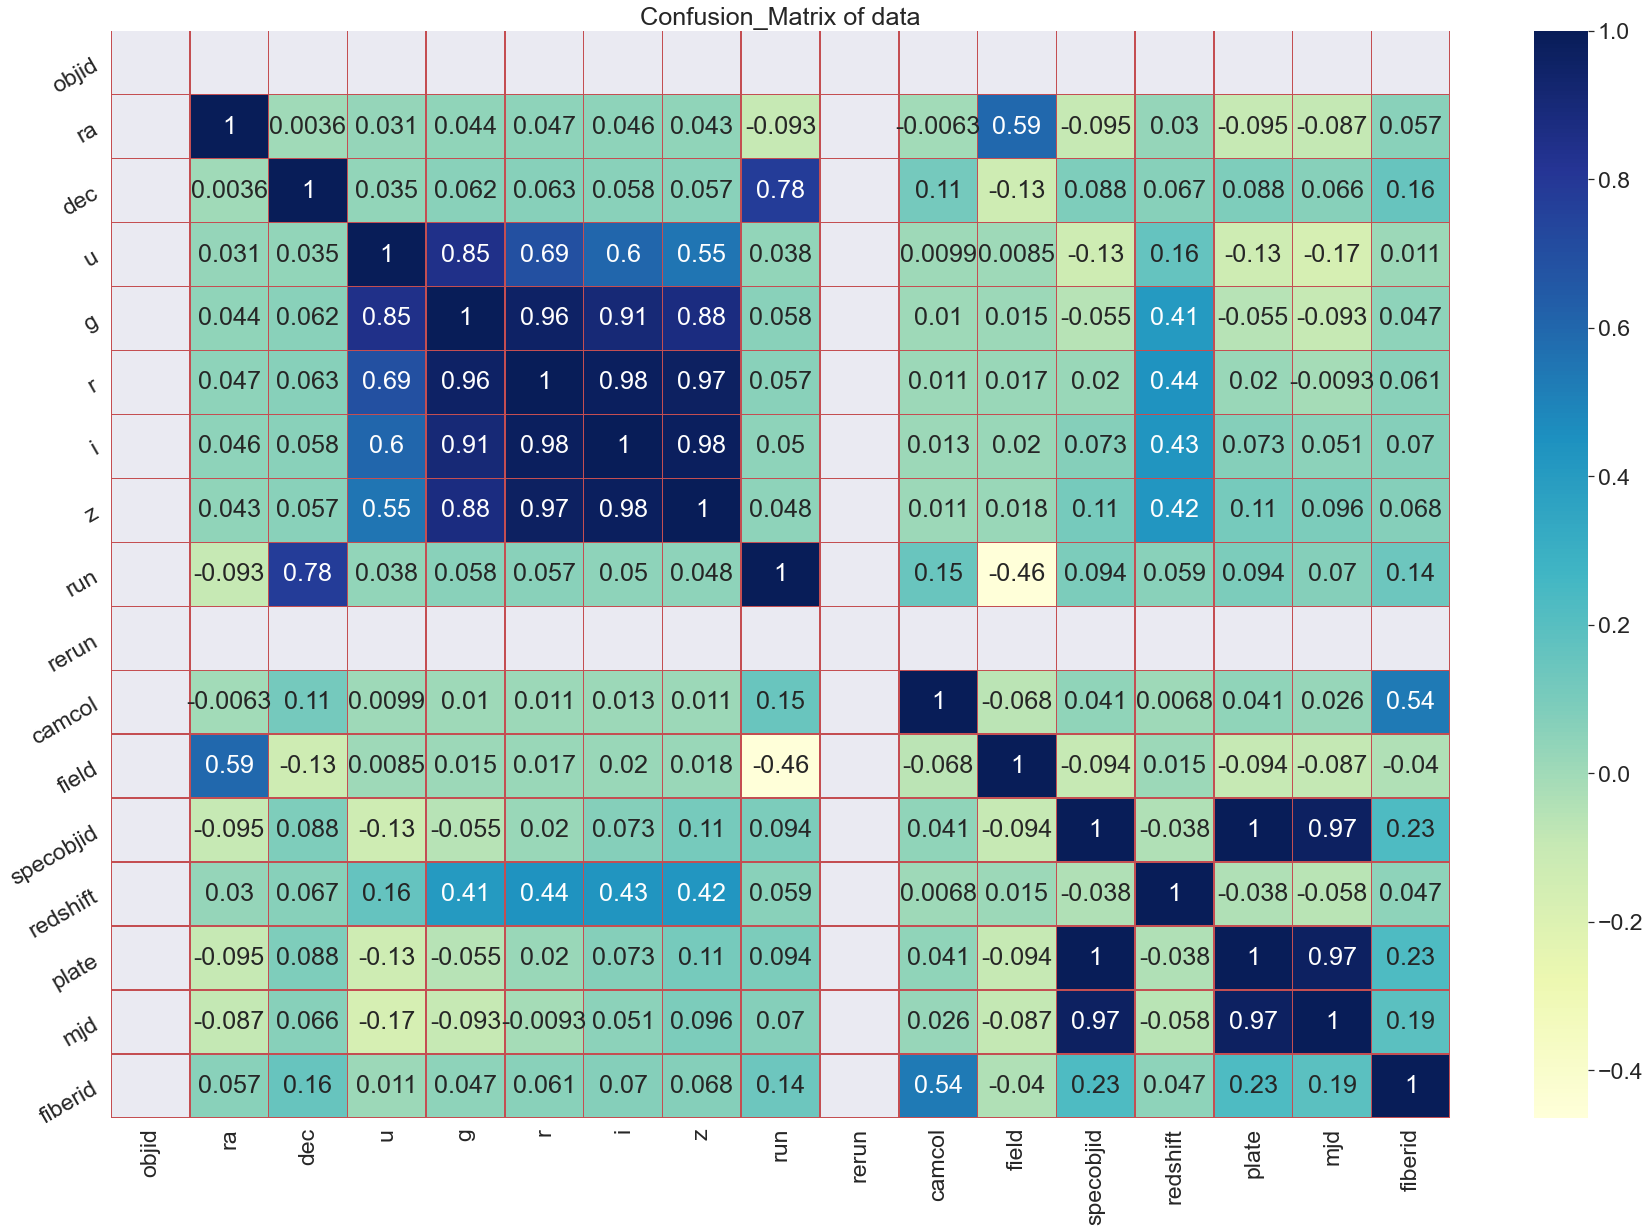

In [49]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [30 , 20]} , font_scale=2.1)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [50]:
df.head(2)

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   

          z  run  rerun  camcol  field     specobjid class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18  STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17  STAR -0.000055    323   

     mjd  fiberid  
0  54922      491  
1  51615      541

In [51]:
# To Present species of class ::
classs = df["class"].value_counts()
classs

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

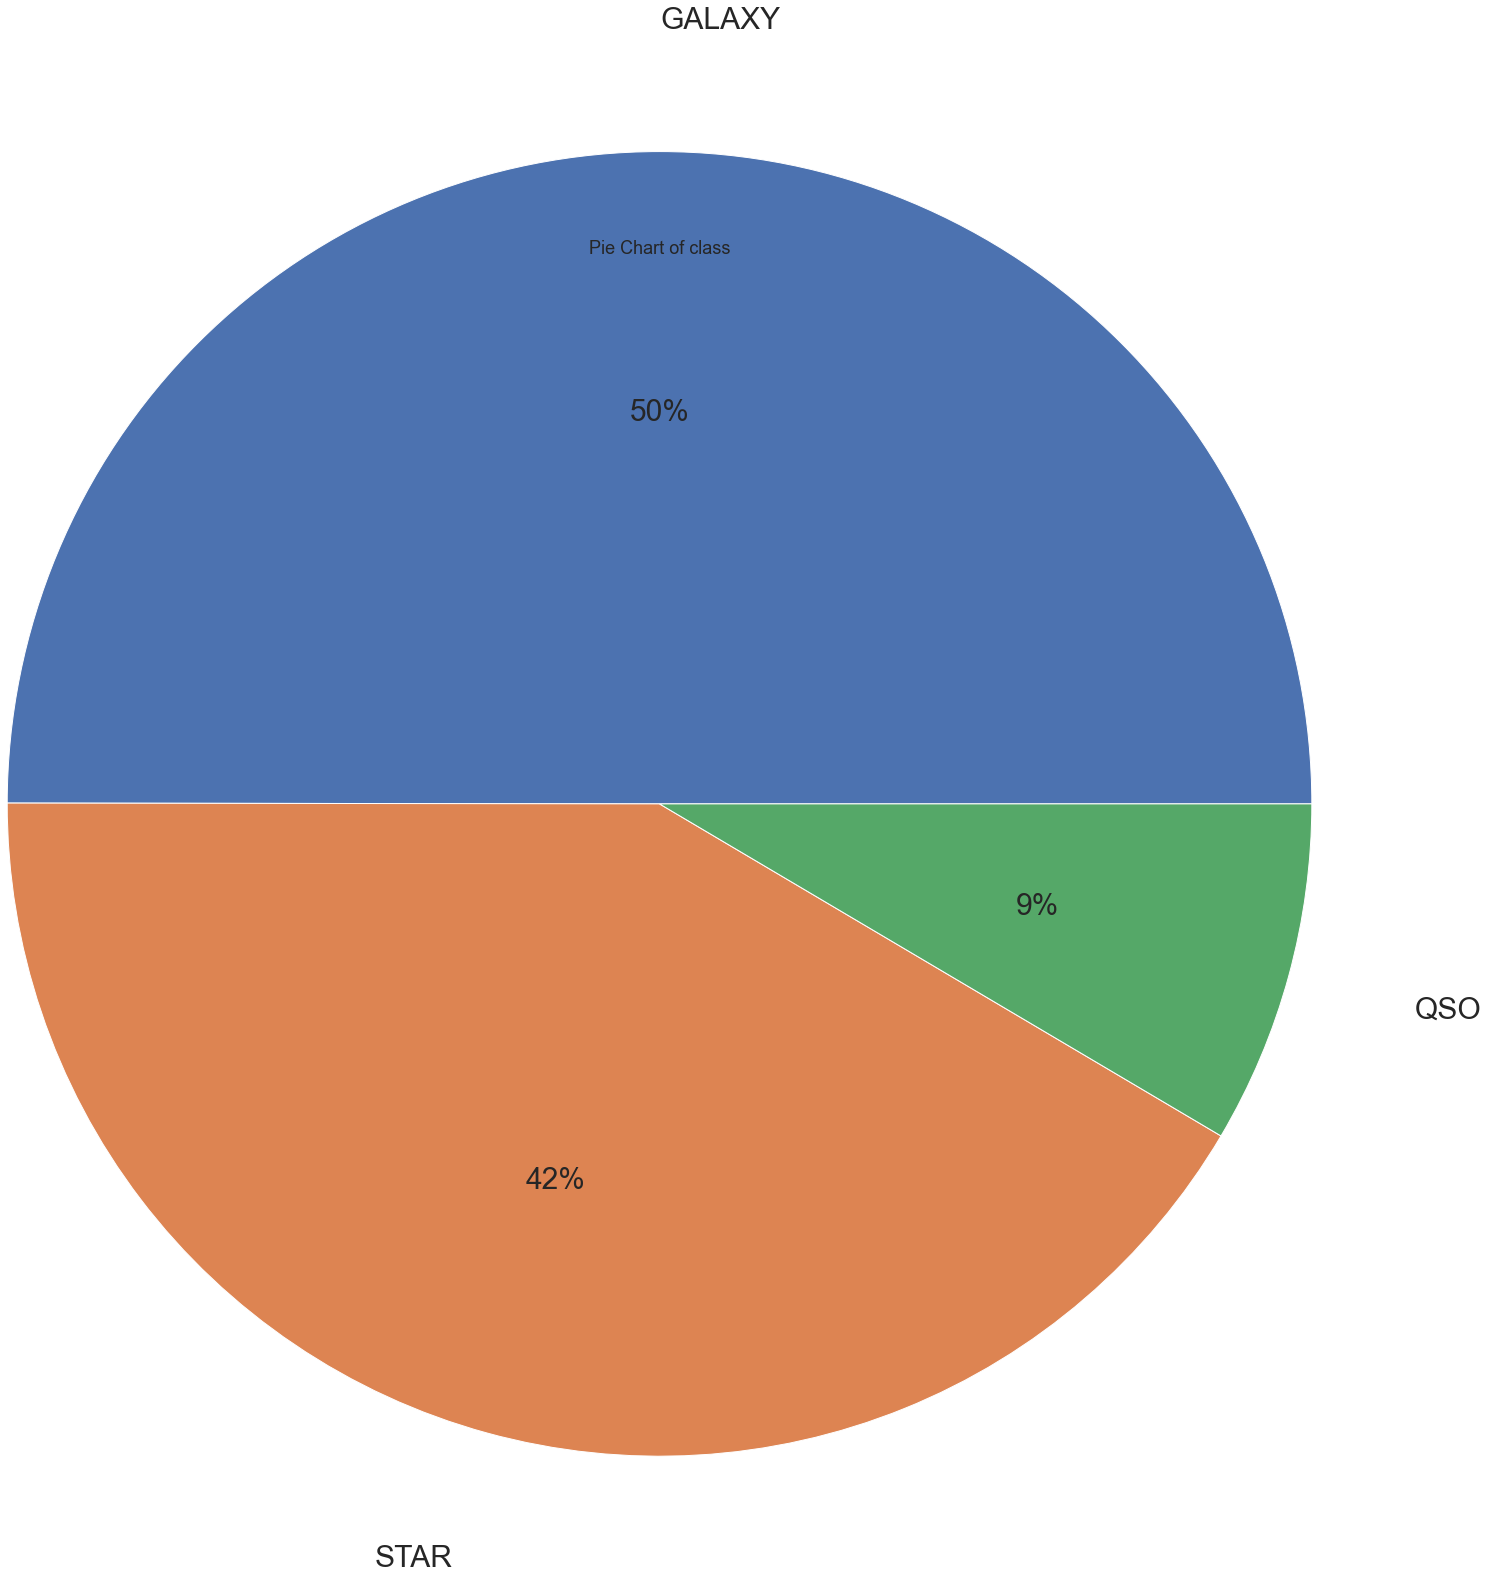

In [52]:
# Visualize Comparing workclass ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
classs.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of class")
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [54]:
df.head(2)

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   

          z  run  rerun  camcol  field     specobjid class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18  STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17  STAR -0.000055    323   

     mjd  fiberid  
0  54922      491  
1  51615      541

Text(0.5, 1.0, 'Distribution Plot of run')

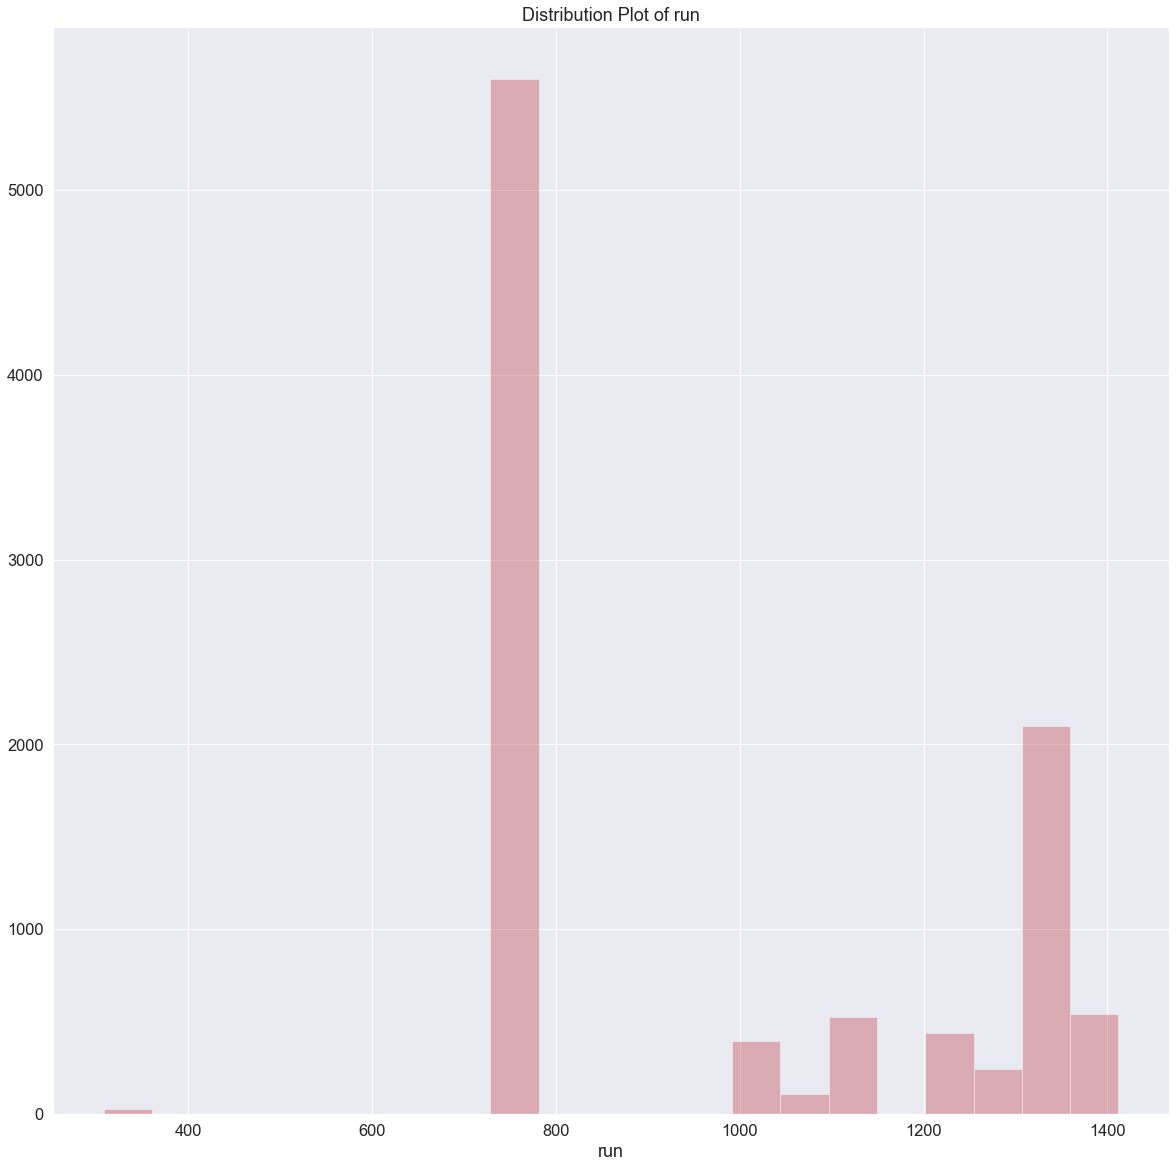

In [55]:
sns.distplot(df["run"] , kde=False , color="r")
plt.title("Distribution Plot of run")

Text(0.5, 1.0, 'Kde Plot of run')

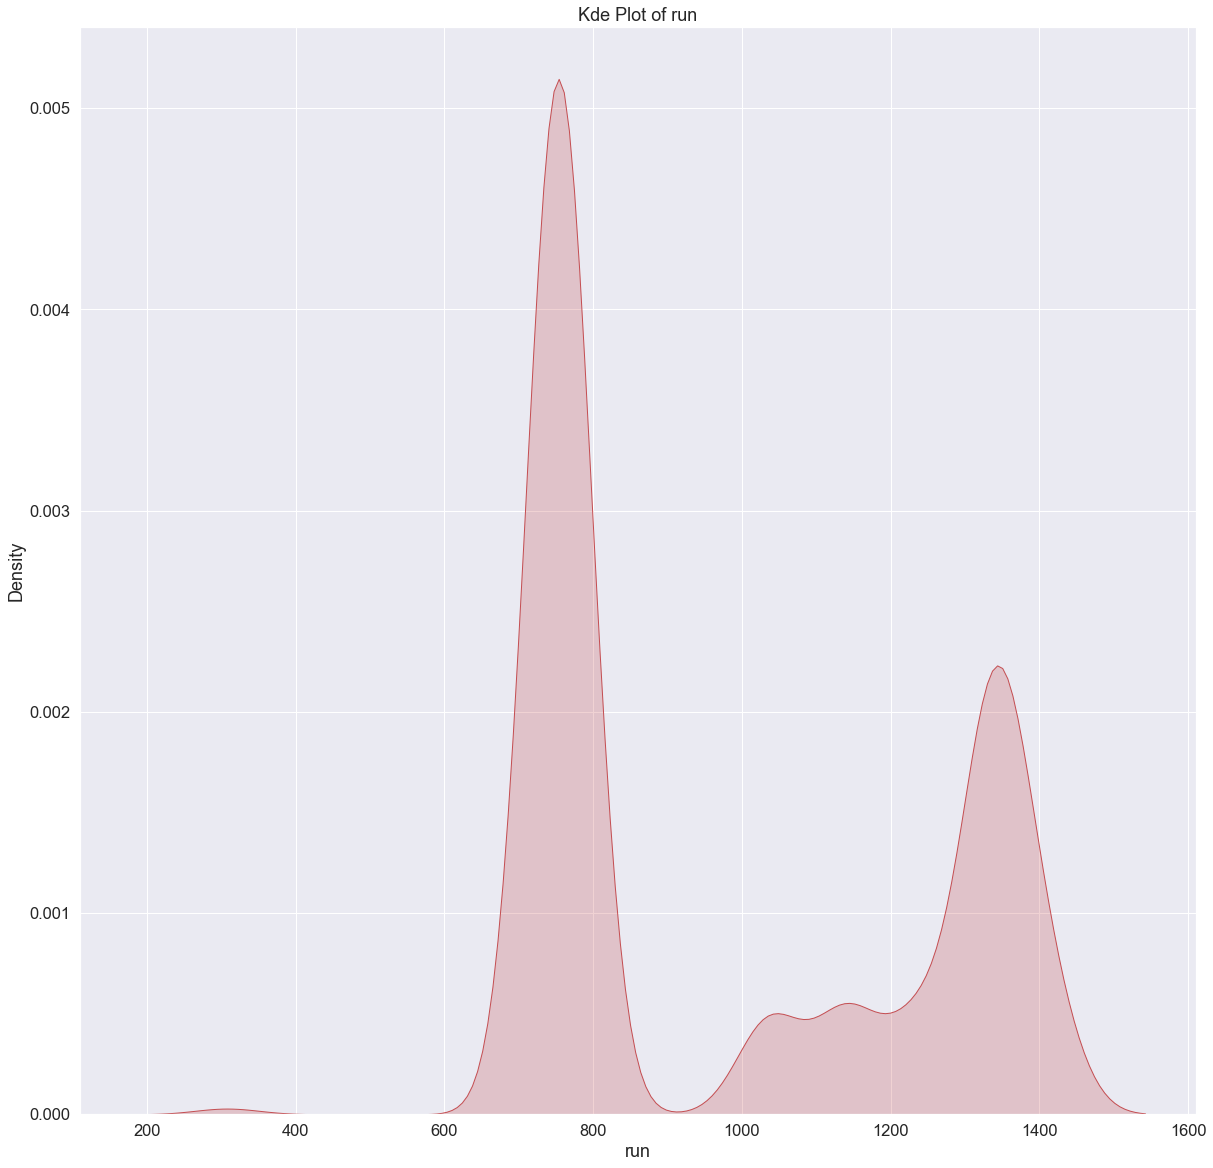

In [56]:
sns.kdeplot(df["run"] , shade=True , color="r")
plt.title("Kde Plot of run")

Text(0.5, 1.0, 'Distribution Plot of rerun')

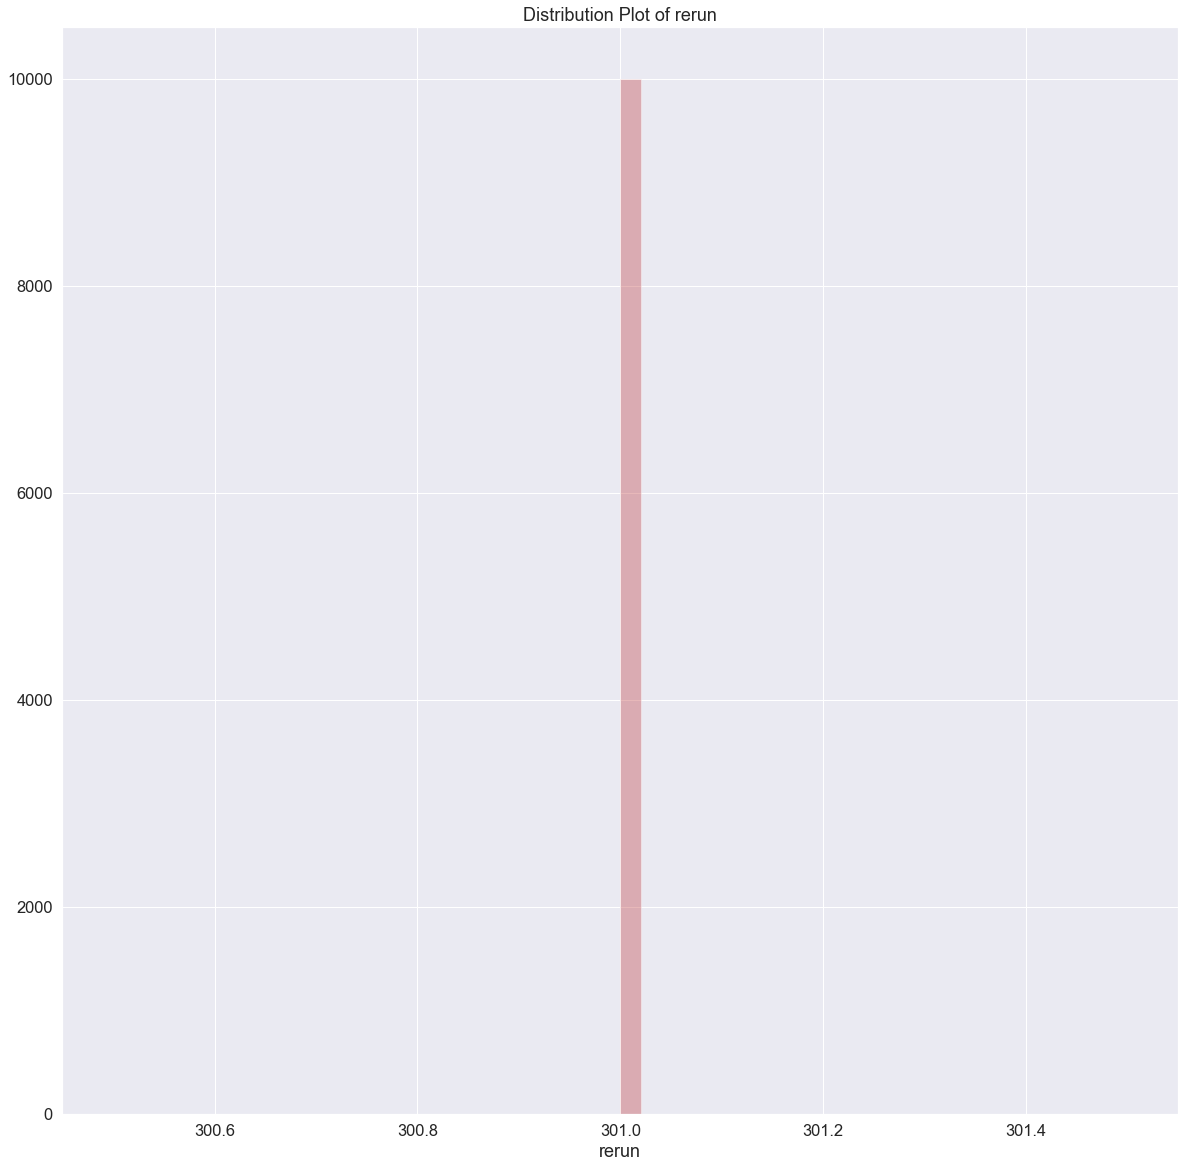

In [57]:
sns.distplot(df["rerun"] , kde=False , color="r")
plt.title("Distribution Plot of rerun")

Text(0.5, 1.0, 'Kde Plot of rerun')

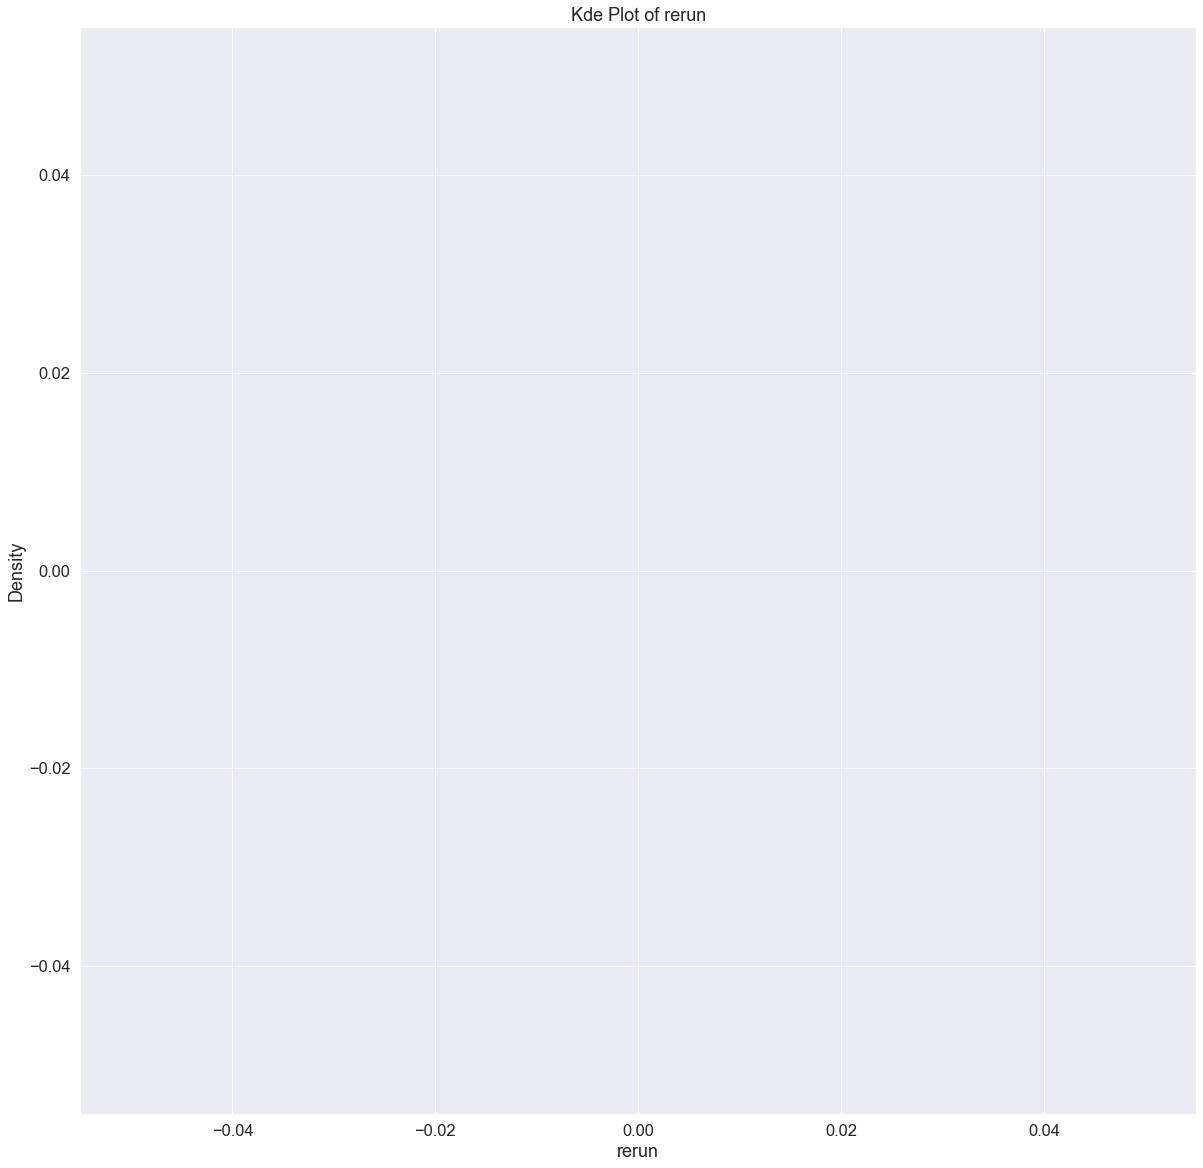

In [58]:
sns.kdeplot(df["rerun"] , shade=True , color="r")
plt.title("Kde Plot of rerun")

Text(0.5, 1.0, 'Distribution Plot of camcol')

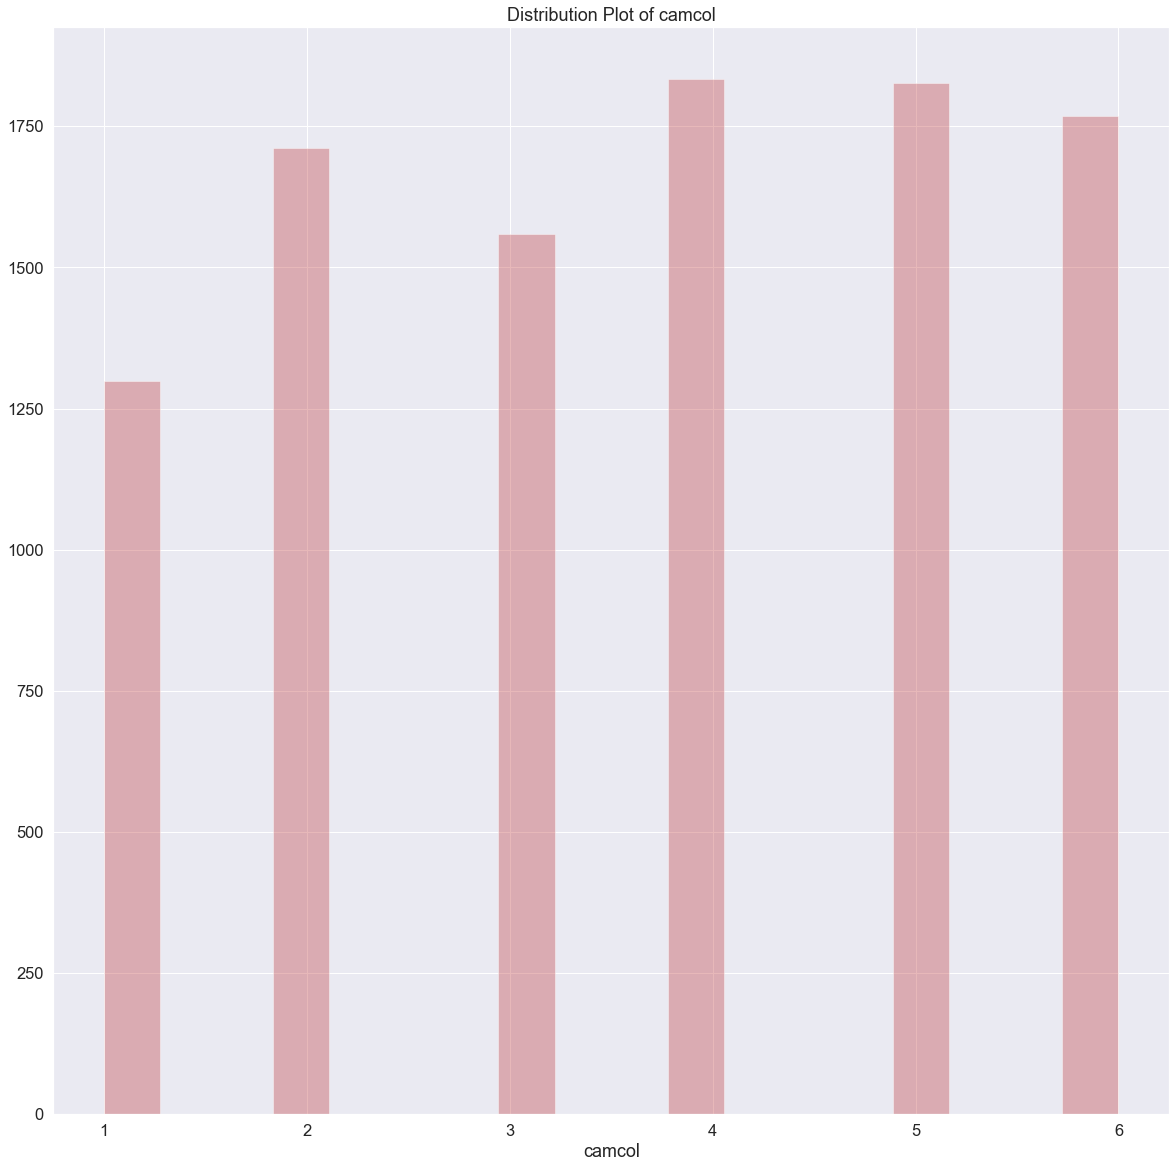

In [59]:
sns.distplot(df["camcol"] , kde=False , color="r")
plt.title("Distribution Plot of camcol")

Text(0.5, 1.0, 'Kde Plot of camcol')

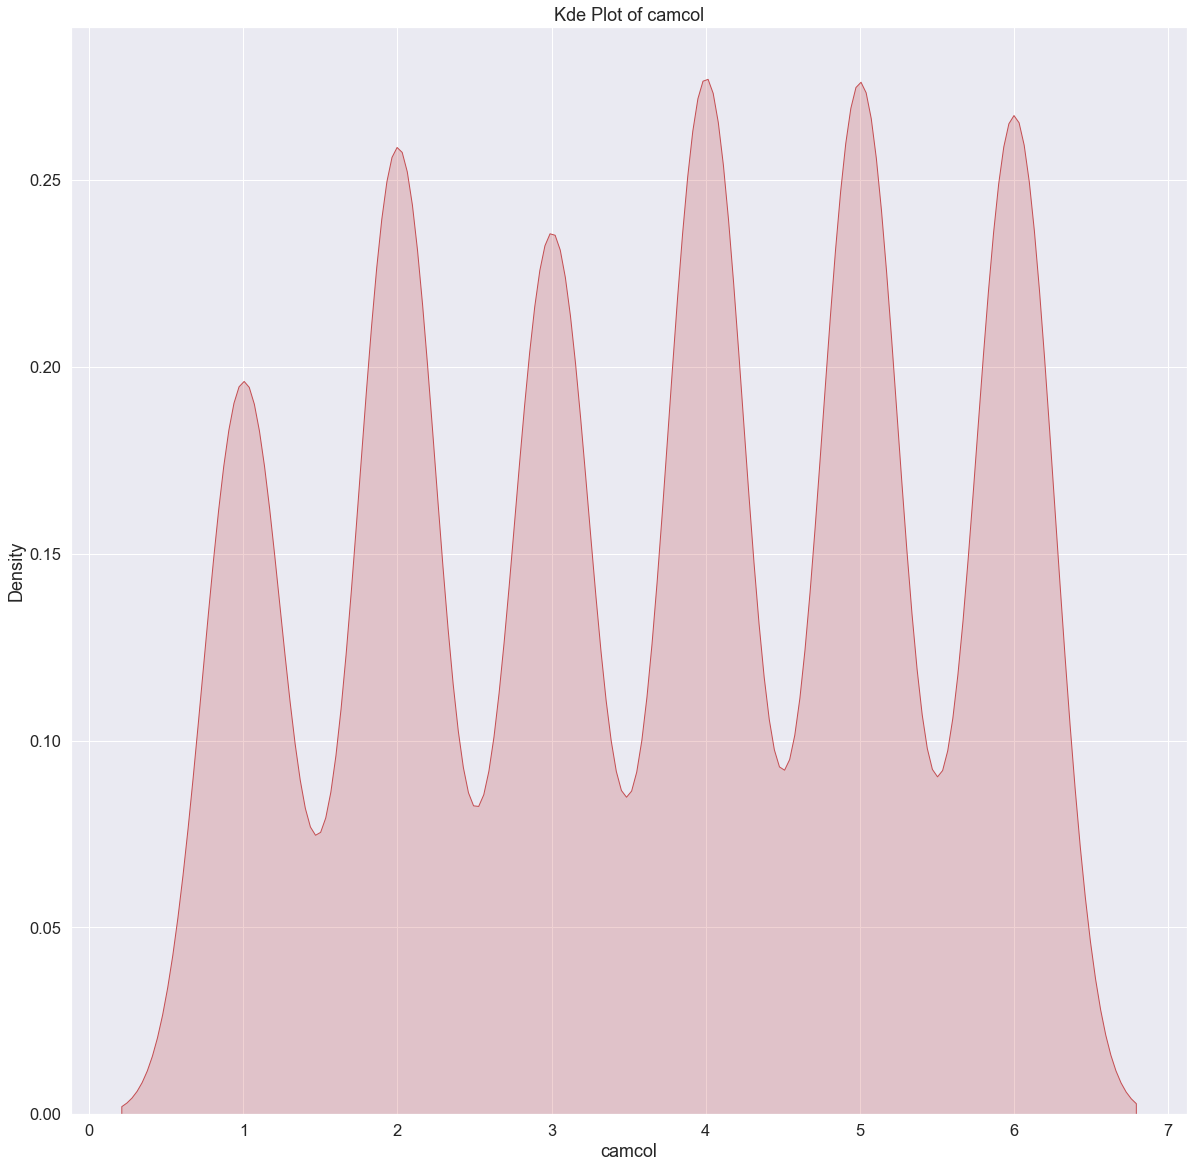

In [60]:
sns.kdeplot(df["camcol"] , shade=True , color="r")
plt.title("Kde Plot of camcol")

Text(0.5, 1.0, 'Distribution Plot of field')

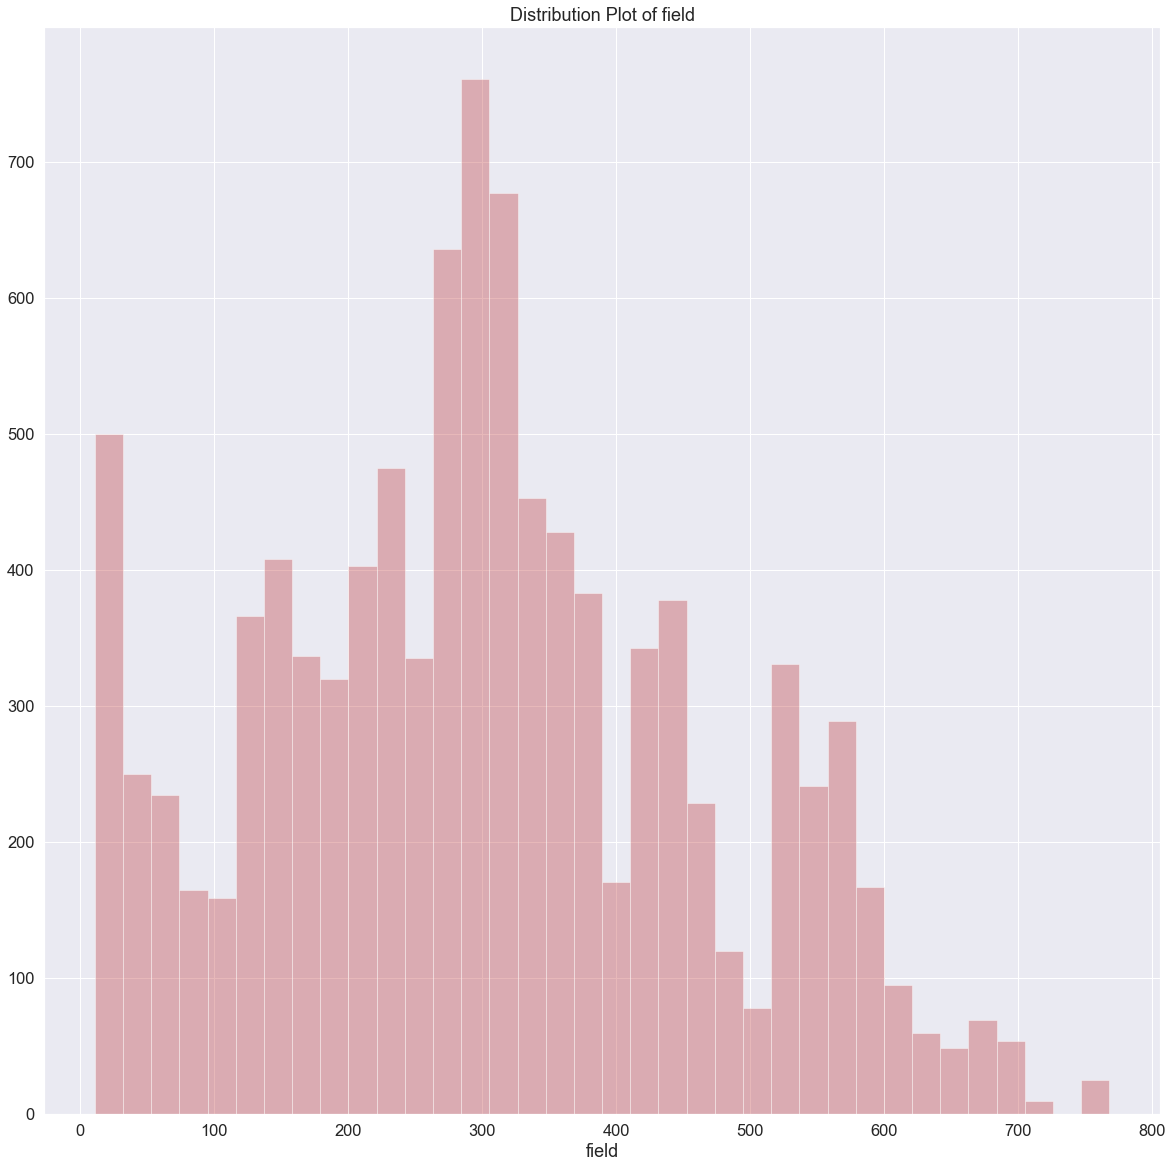

In [61]:
sns.distplot(df["field"] , kde=False , color="r")
plt.title("Distribution Plot of field")

Text(0.5, 1.0, 'Kde Plot of field')

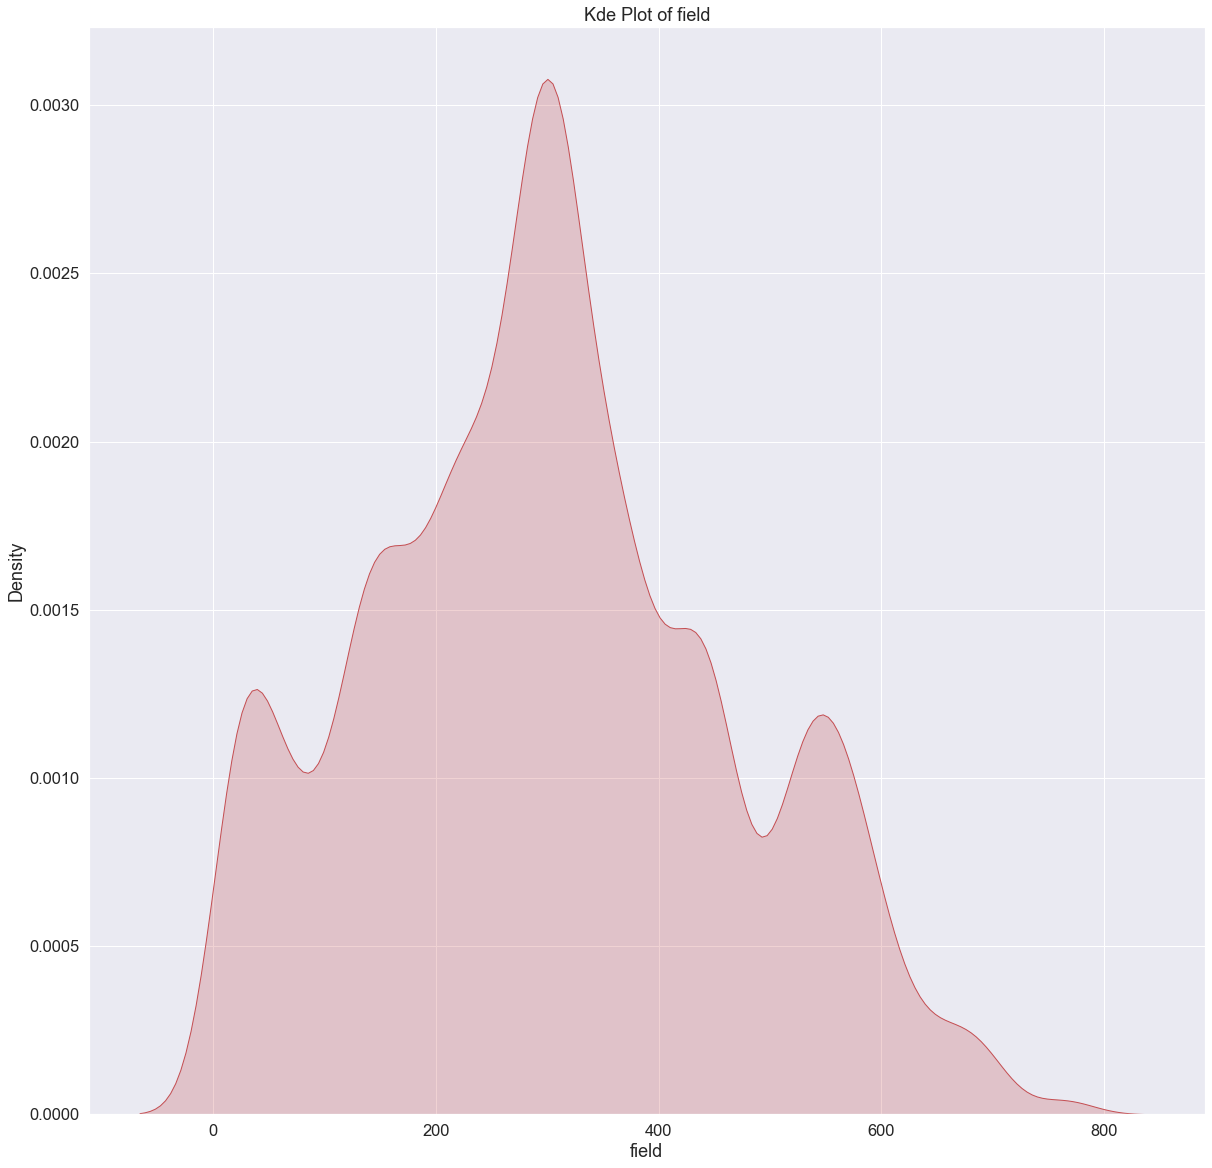

In [62]:
sns.kdeplot(df["field"] , shade=True , color="r")
plt.title("Kde Plot of field")

Text(0.5, 1.0, 'Distribution Plot of specobjid')

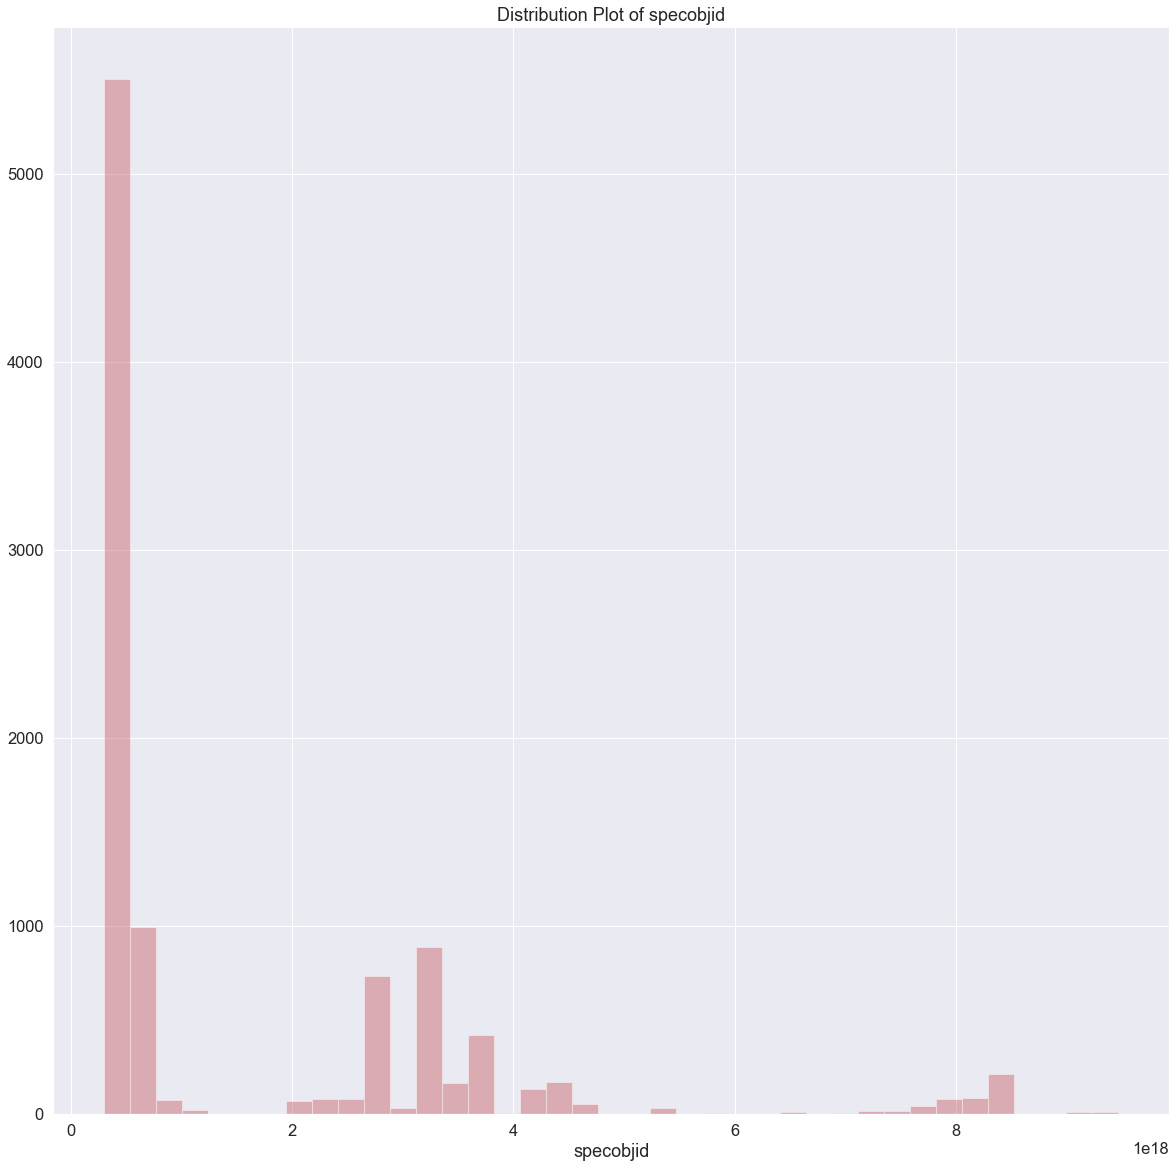

In [63]:
sns.distplot(df["specobjid"] , kde=False , color="r")
plt.title("Distribution Plot of specobjid")

Text(0.5, 1.0, 'Kde Plot of specobjid')

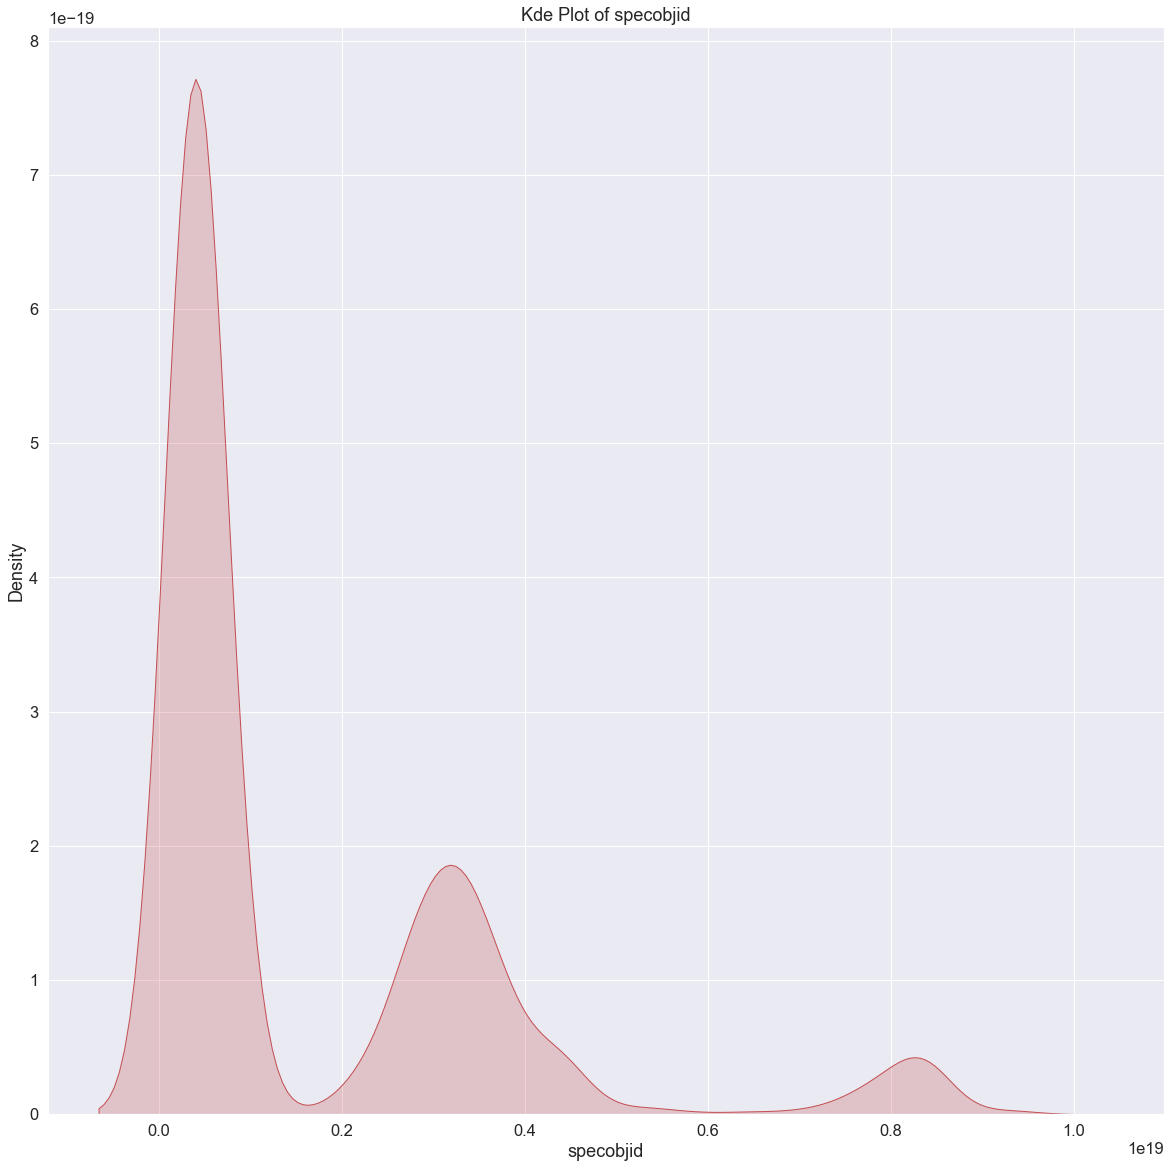

In [64]:
sns.kdeplot(df["specobjid"] , shade=True , color="r")
plt.title("Kde Plot of specobjid")

Text(0.5, 1.0, 'Distribution Plot of plate')

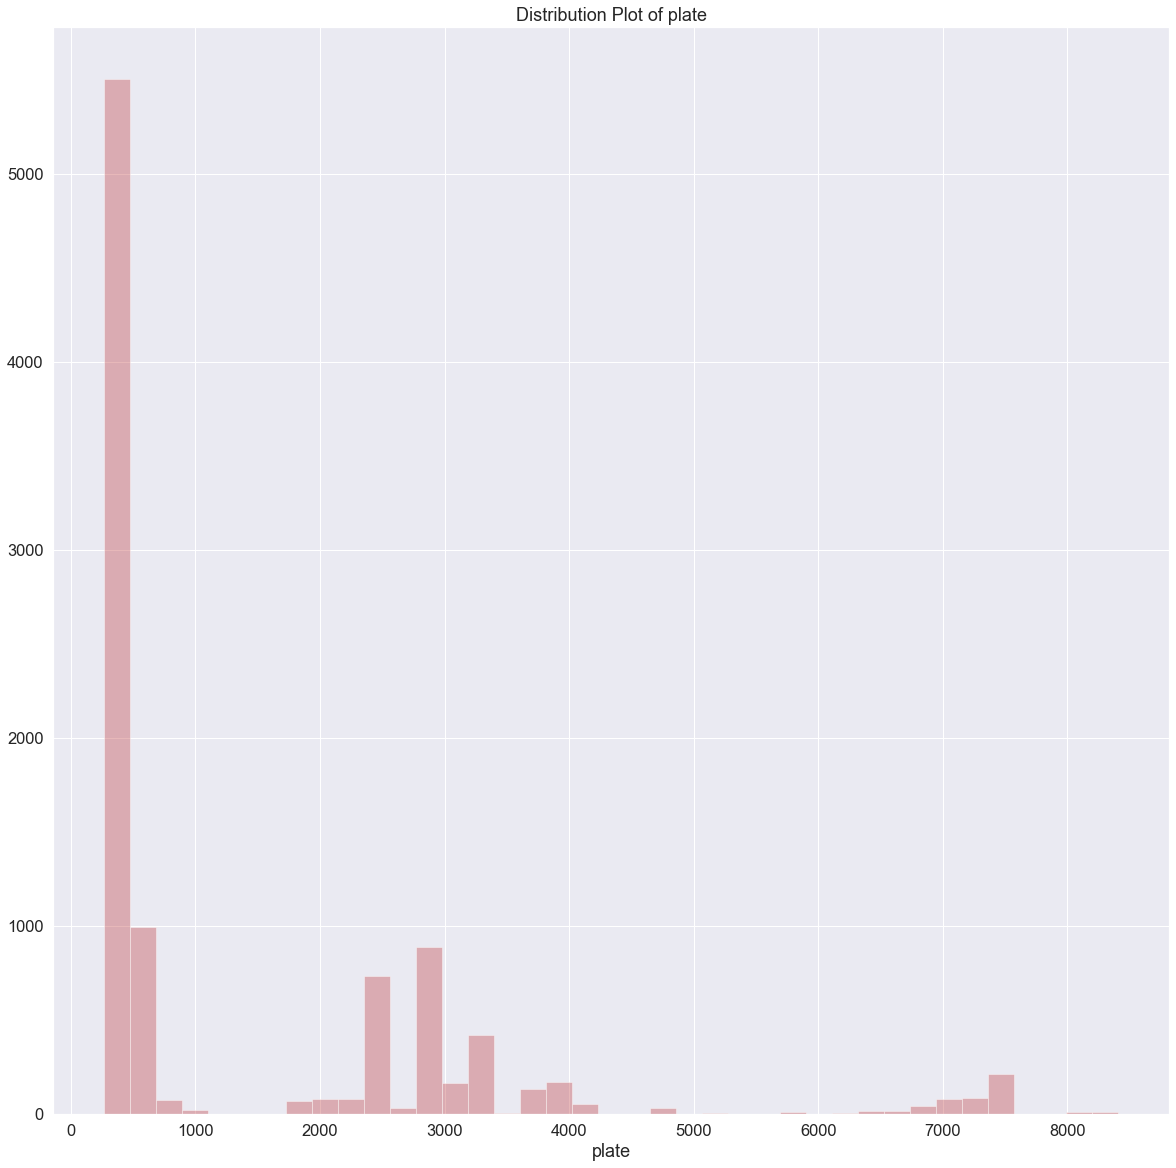

In [65]:
sns.distplot(df["plate"] , kde=False , color="r")
plt.title("Distribution Plot of plate")

Text(0.5, 1.0, 'Kde Plot of plate')

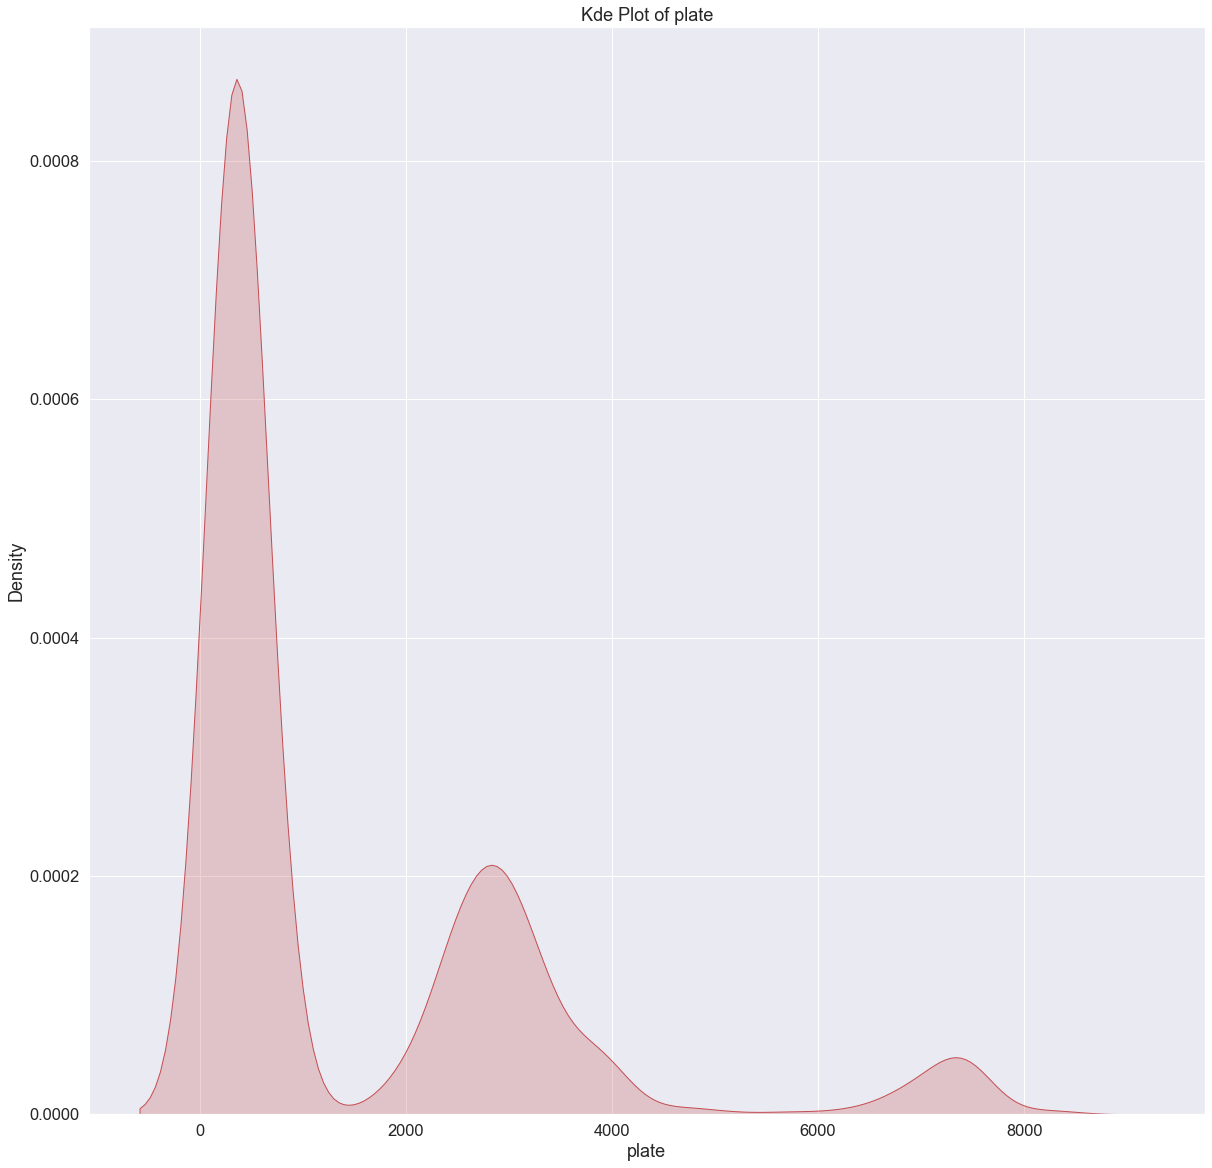

In [66]:
sns.kdeplot(df["plate"] , shade=True , color="r")
plt.title("Kde Plot of plate")

Text(0.5, 1.0, 'Distribution Plot of mjd')

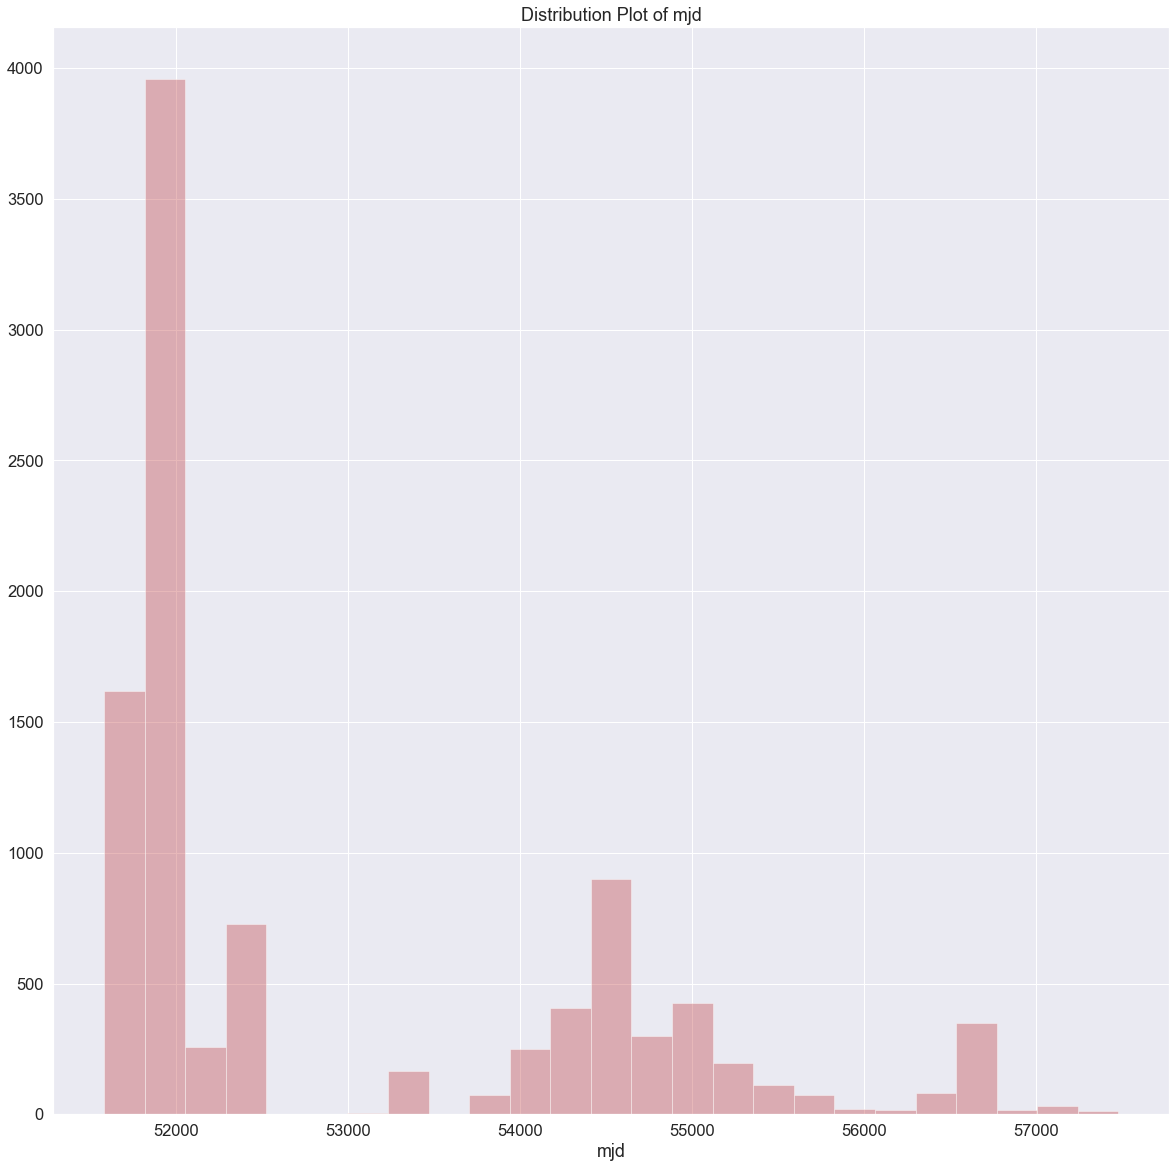

In [67]:
sns.distplot(df["mjd"] , kde=False , color="r")
plt.title("Distribution Plot of mjd")

Text(0.5, 1.0, 'Kde Plot of mjd')

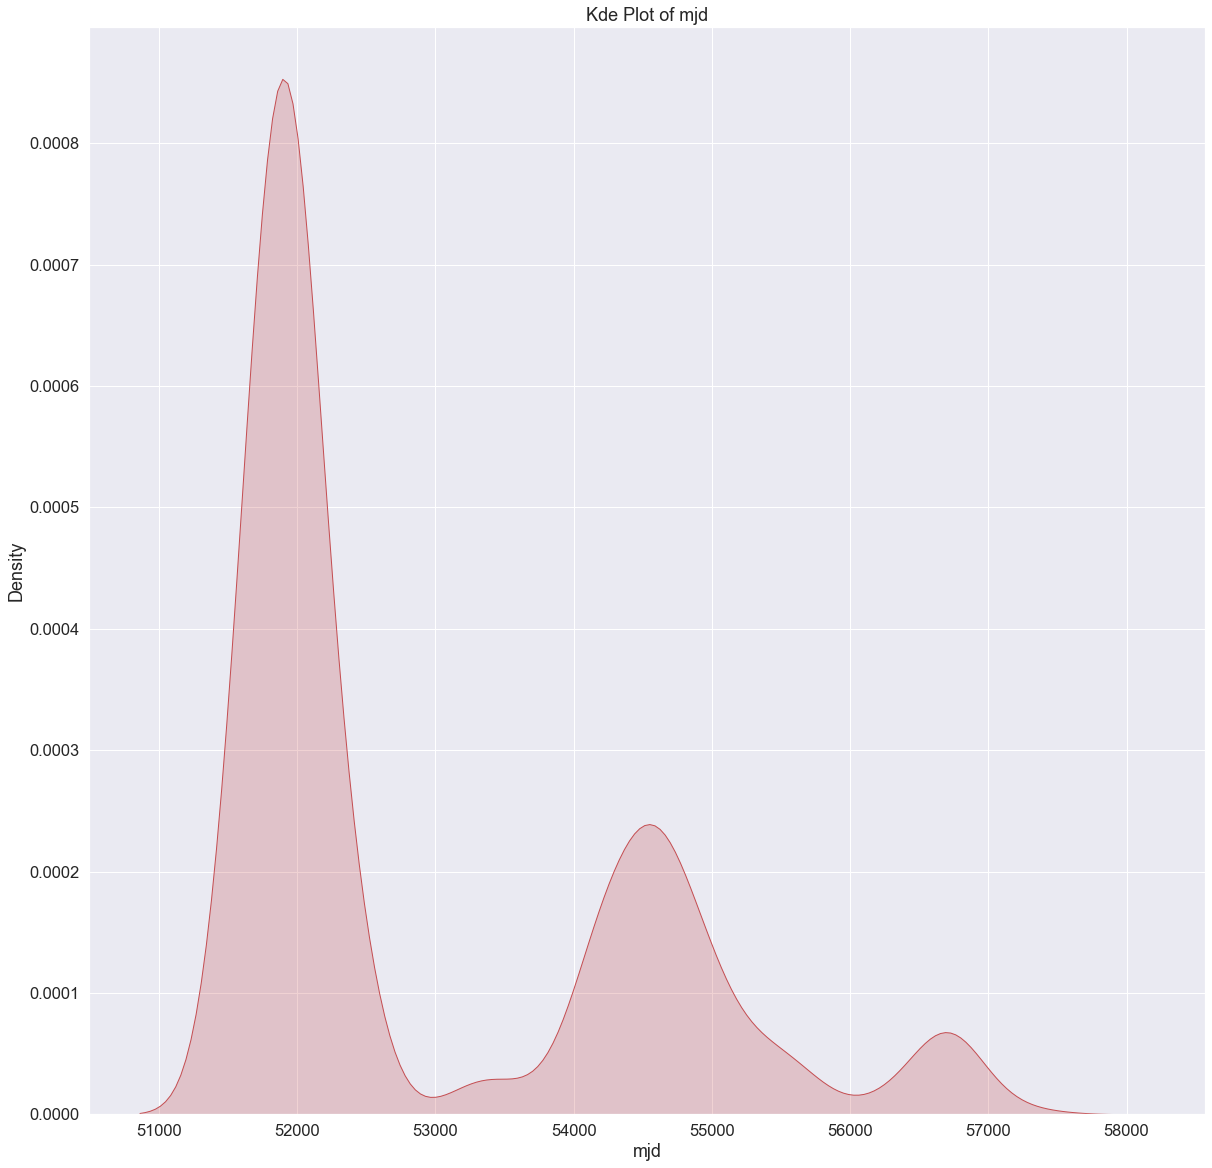

In [68]:
sns.kdeplot(df["mjd"] , shade=True , color="r")
plt.title("Kde Plot of mjd")

Text(0.5, 1.0, 'Distribution Plot of fiberid')

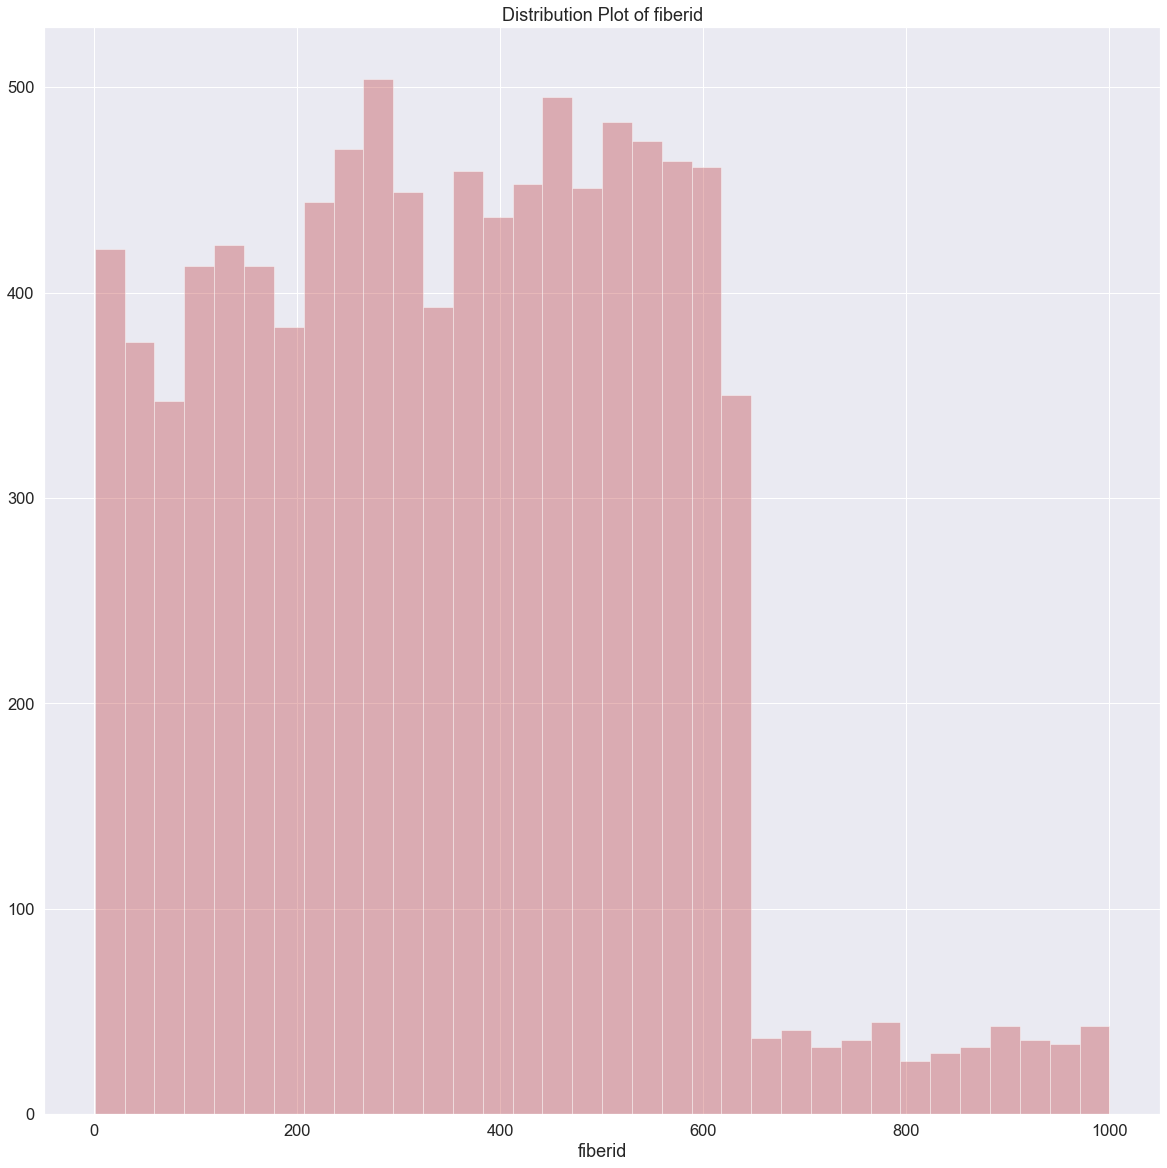

In [69]:
sns.distplot(df["fiberid"] , kde=False , color="r")
plt.title("Distribution Plot of fiberid")

Text(0.5, 1.0, 'Kde Plot of fiberid')

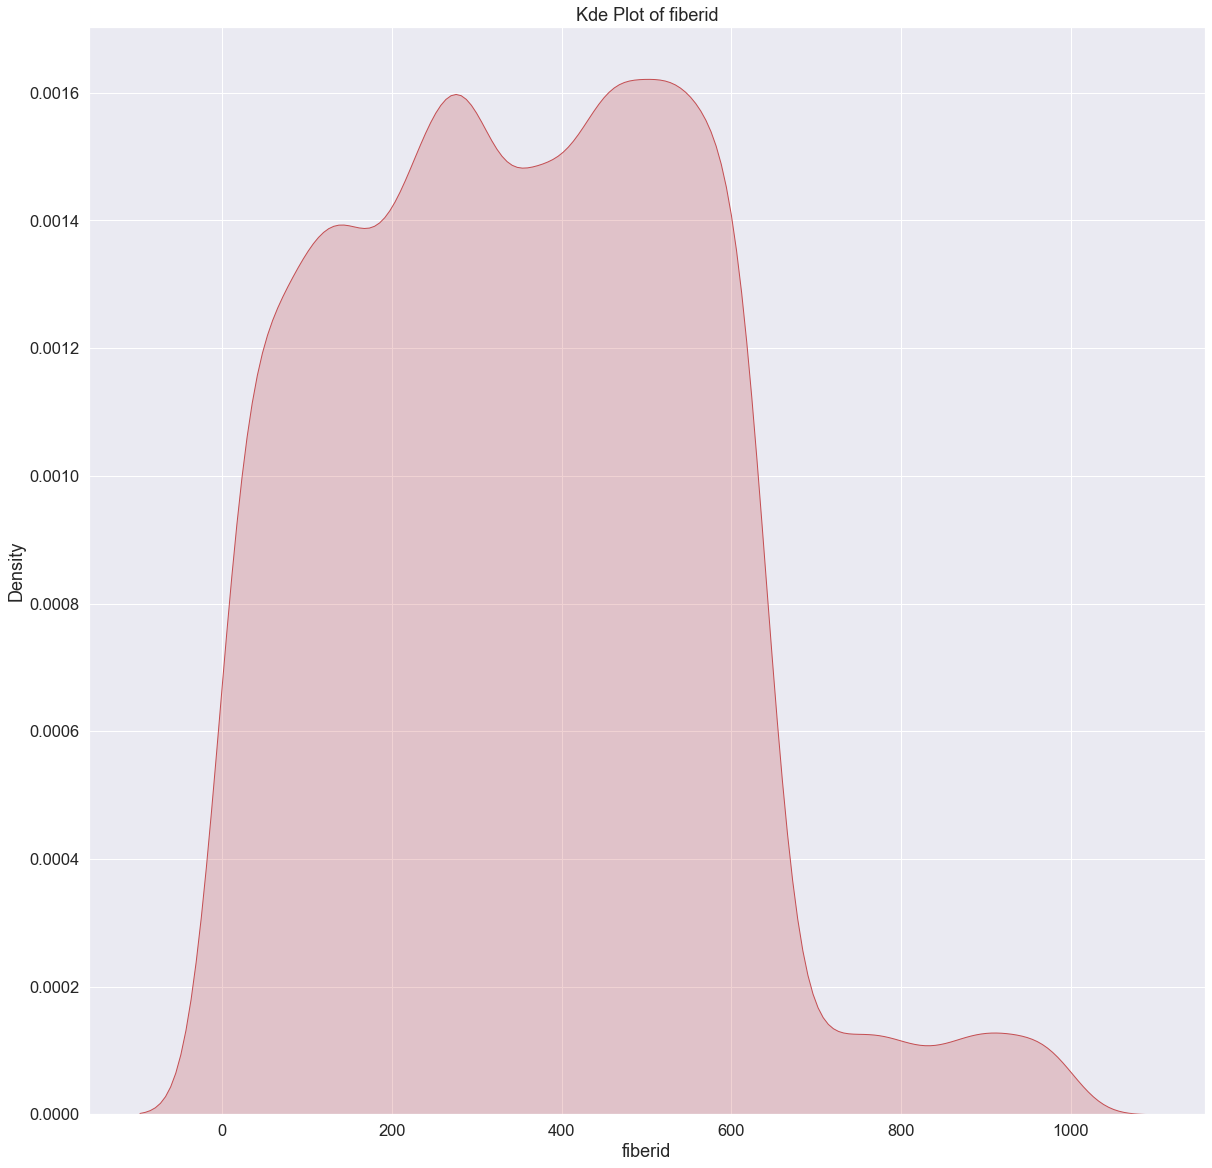

In [70]:
sns.kdeplot(df["fiberid"] , shade=True , color="r")
plt.title("Kde Plot of fiberid")

Text(0.5, 1.0, 'Distribution Plot of ra')

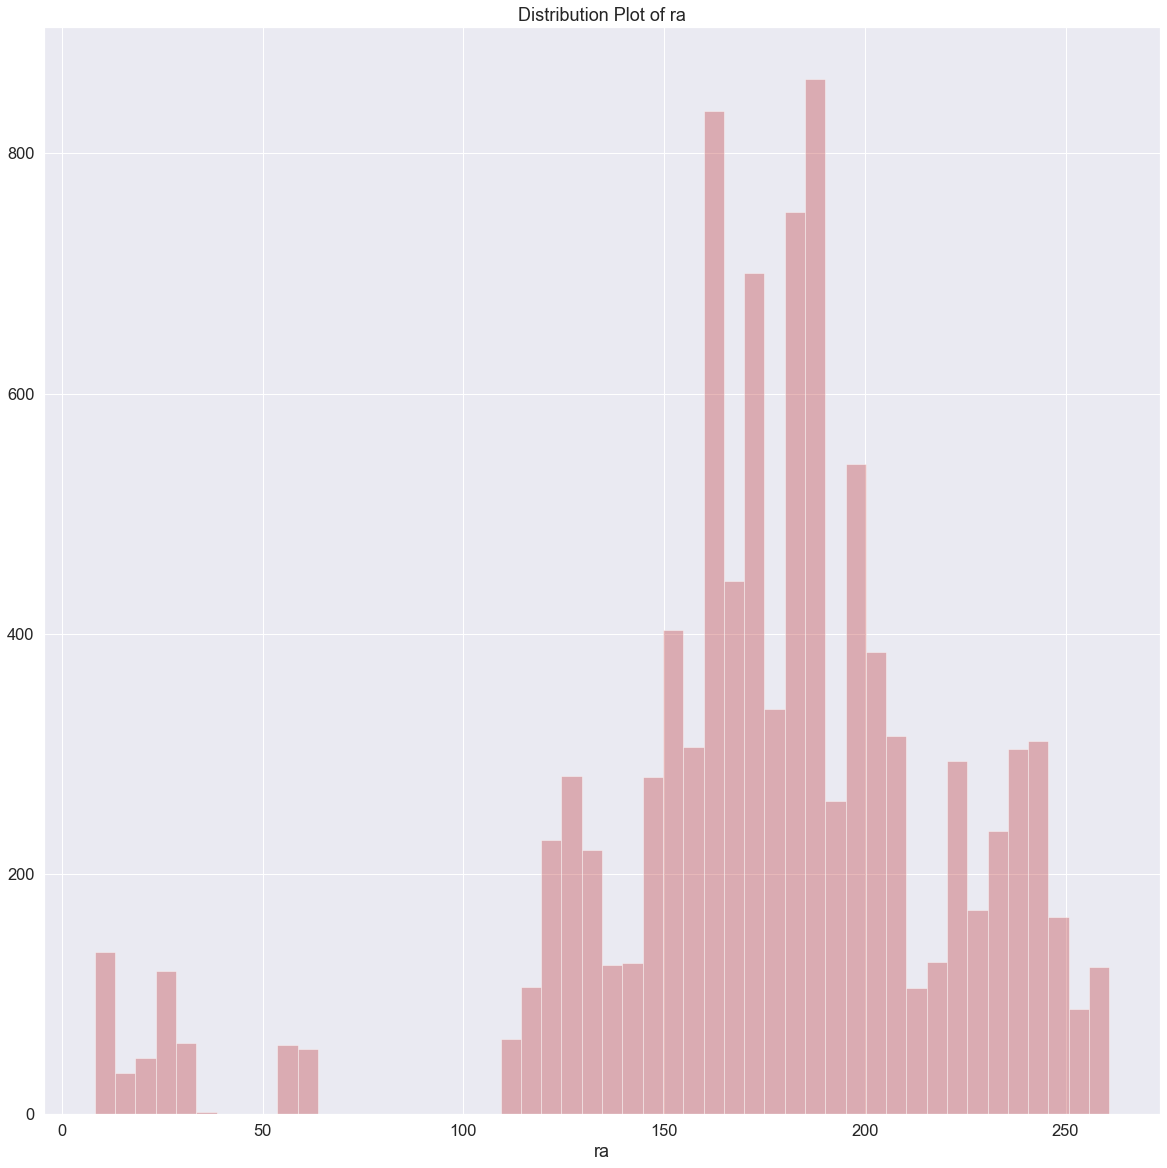

In [71]:
sns.distplot(df["ra"] , kde=False , color="r")
plt.title("Distribution Plot of ra")

Text(0.5, 1.0, 'Kde Plot of ra')

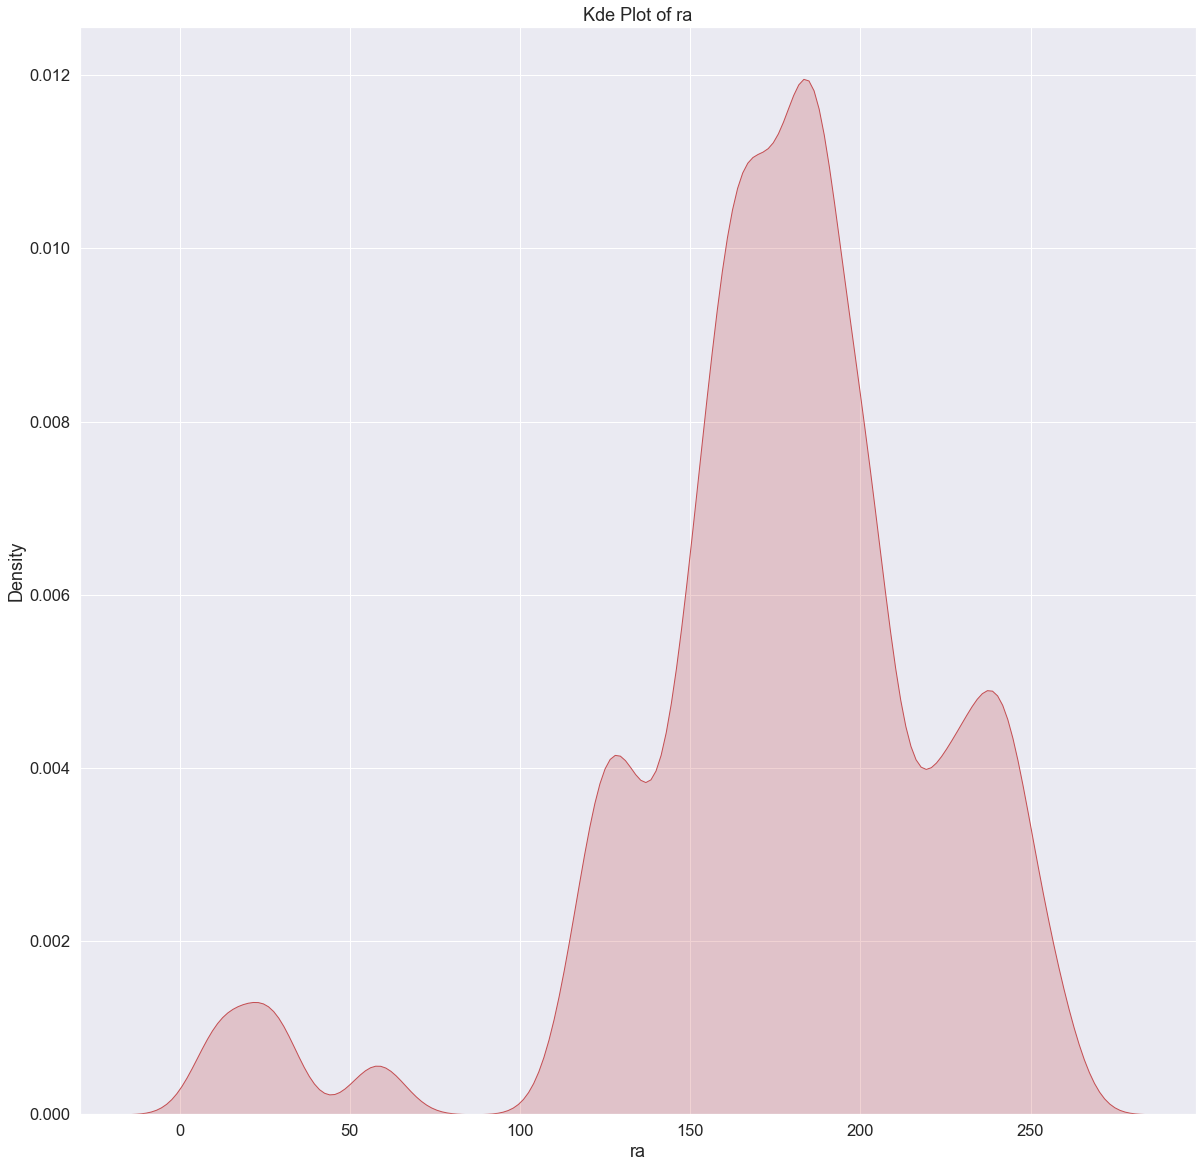

In [72]:
sns.kdeplot(df["ra"] , shade=True , color="r")
plt.title("Kde Plot of ra")

Text(0.5, 1.0, 'Galaxy')

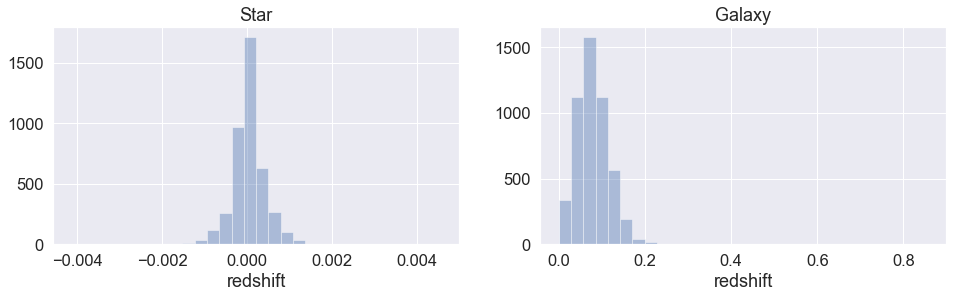

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
ax = sns.distplot(df[df['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(df[df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')

Text(0.5, 1.0, 'Count Plot of workclass   ')

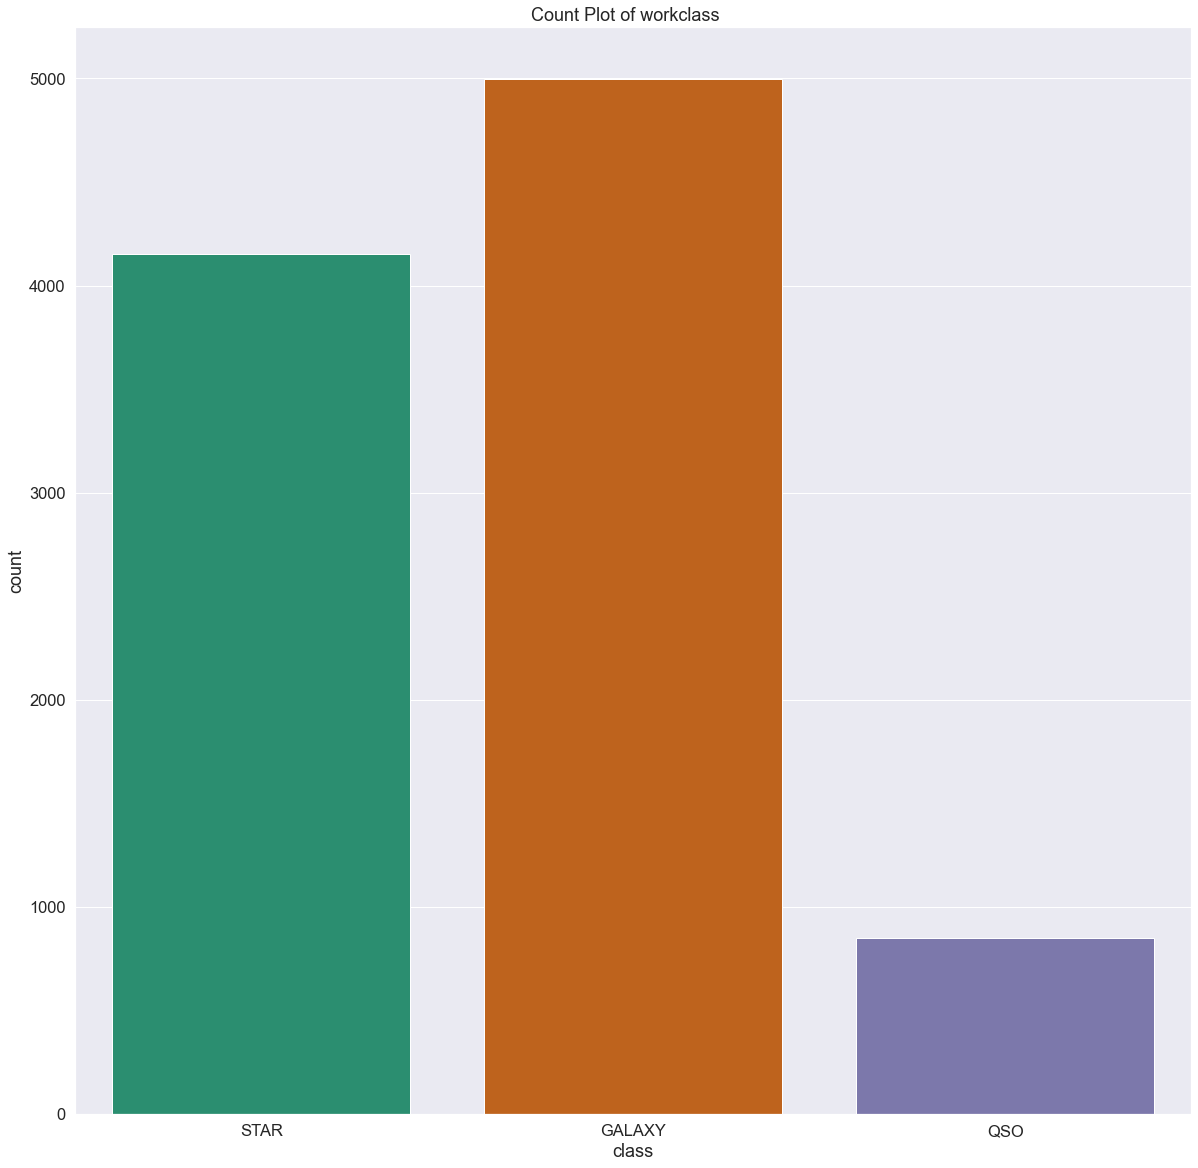

In [74]:
sns.countplot( x = "class"  , data = df , palette="Dark2")
plt.title("Count Plot of workclass   ")


In [75]:
# get describtion file of data ::

profile = pp.ProfileReport(df , title = " Sloan-Sky-Survey_Report" , explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
# To save report as html file
profile.to_file("Sloan-Sky-Survey_Data_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [77]:
df

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [78]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (objid)

The Unique Values of (objid) :: [1.23765e+18]


The Value_Counts of (objid) :: 
1.237650e+18    10000
Name: objid, dtype: int64
--------------------------------------------------------------------------------
The Col (ra)

The Unique Values of (ra) :: [183.5313257 183.5983705 183.6802074 ... 131.5525623 131.4771511
 131.6650121]


The Value_Counts of (ra) :: 
242.844196    1
187.152936    1
183.128479    1
122.117611    1
222.392751    1
             ..
223.520914    1
185.551316    1
157.234361    1
191.900624    1
239.944971    1
Name: ra, Length: 10000, dtype: int64
--------------------------------------------------------------------------------
The Col (dec)

The Unique Values of (dec) :: [ 0.08969303  0.13528503  0.12618509 ... 51.66698638 51.75306779
 51.80530747]


The Value_Counts of (dec) :: 
-0.980032     1
 1.068823     1
 0.671442     1
-1.433766     1
 64.007864    1
             ..
-1.808774     1
 61.353390    1
-1.087122     1
-0.114438     1
 0.000113 

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [79]:
# detect duplicated data ::

df.duplicated().sum()

0

In [80]:
# To confirm that ::
df.drop_duplicates(inplace=True)

In [81]:
# investigate data not include duplicaties records ::

df.duplicated().sum()

0

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [82]:
# detect missing data values ::

df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [83]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
objid                0           0.0
ra                   0           0.0
mjd                  0           0.0
plate                0           0.0
redshift             0           0.0
class                0           0.0
specobjid            0           0.0
field                0           0.0
camcol               0           0.0
rerun                0           0.0
run                  0           0.0
z                    0           0.0
i                    0           0.0
r                    0           0.0
g                    0           0.0
u                    0           0.0
dec                  0           0.0
fiberid              0           0.0

In [84]:
# investigate data not include Missing data

Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
objid                0           0.0
ra                   0           0.0
mjd                  0           0.0
plate                0           0.0
redshift             0           0.0
class                0           0.0
specobjid            0           0.0
field                0           0.0
camcol               0           0.0
rerun                0           0.0
run                  0           0.0
z                    0           0.0
i                    0           0.0
r                    0           0.0
g                    0           0.0
u                    0           0.0
dec                  0           0.0
fiberid              0           0.0

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.

In [85]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

<AxesSubplot:ylabel='objid'>

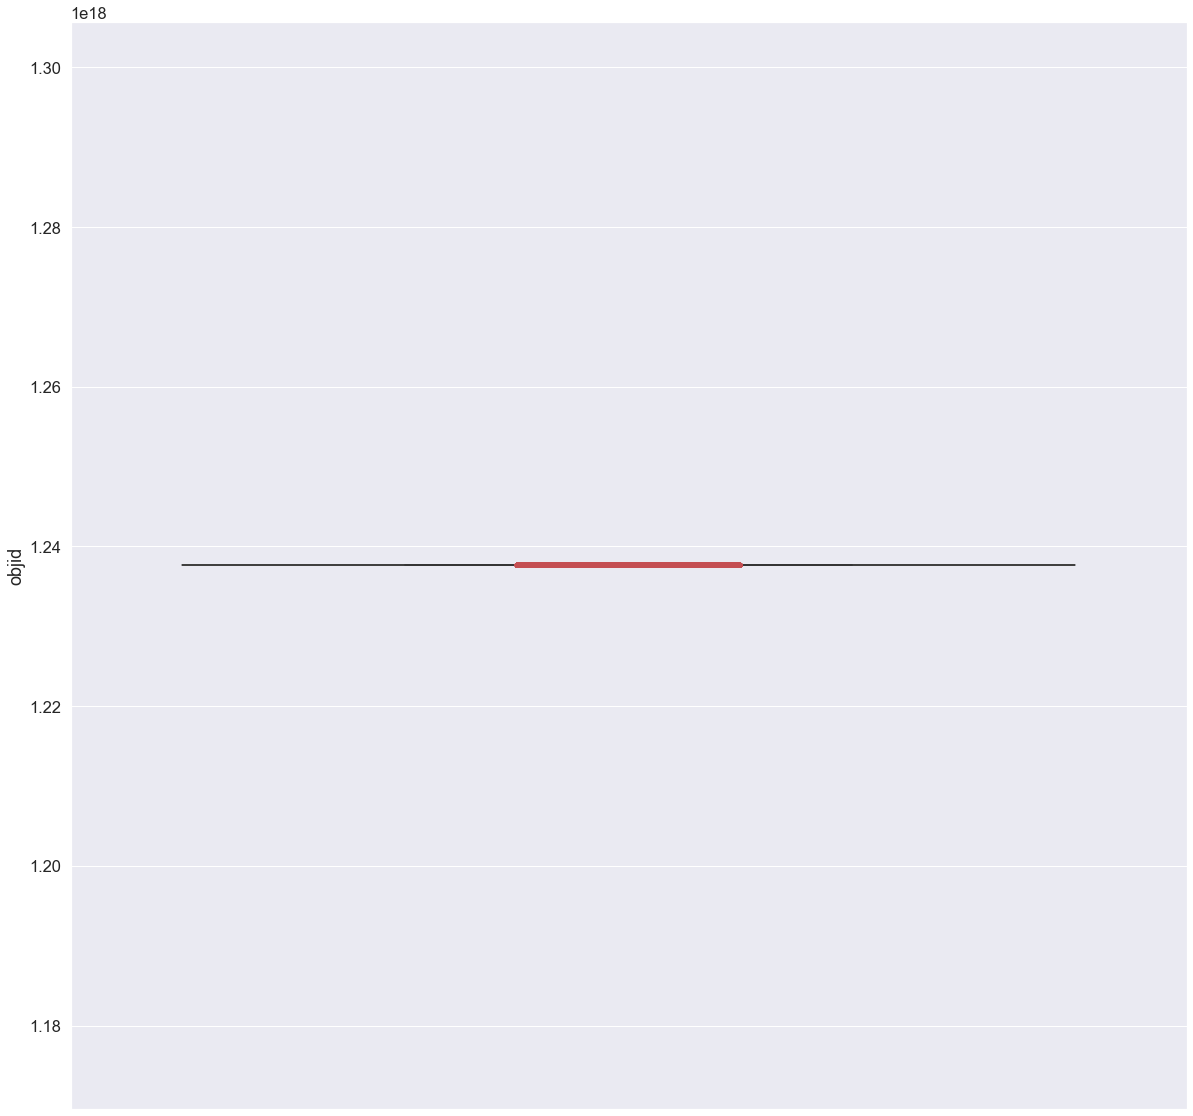

In [86]:
# detect outliers values in objid feature ::

sns.boxplot  (y = "objid" , data = df , palette="viridis")
sns.stripplot(y = "objid" , data = df , color = "r")

<AxesSubplot:ylabel='fiberid'>

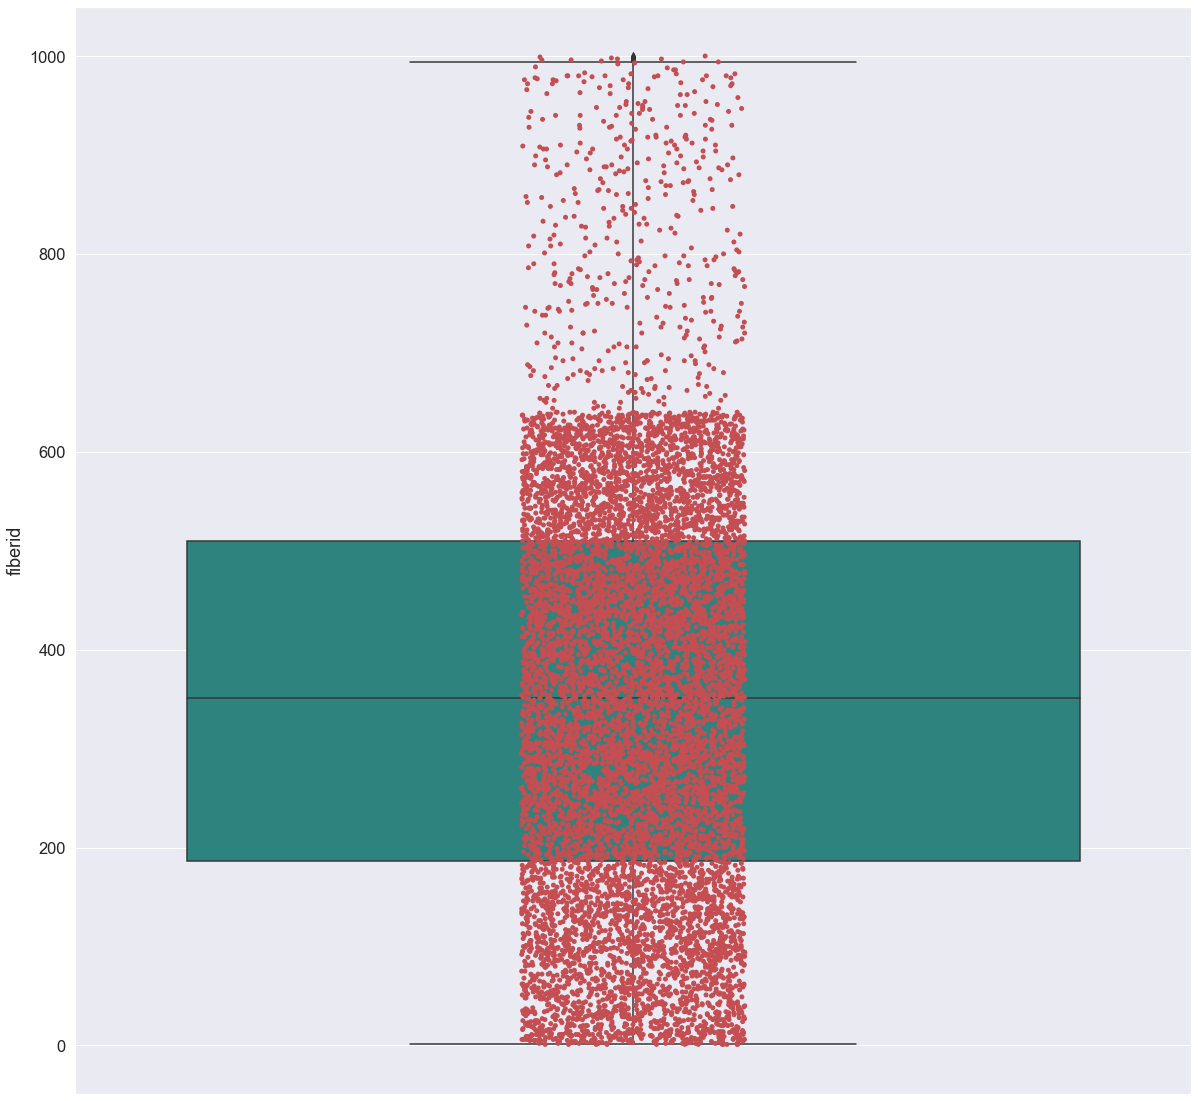

In [87]:
# detect outliers values in fiberid feature ::

sns.boxplot  (y = "fiberid" , data = df , palette="viridis")
sns.stripplot(y = "fiberid" , data = df , color = "r")

<AxesSubplot:ylabel='plate'>

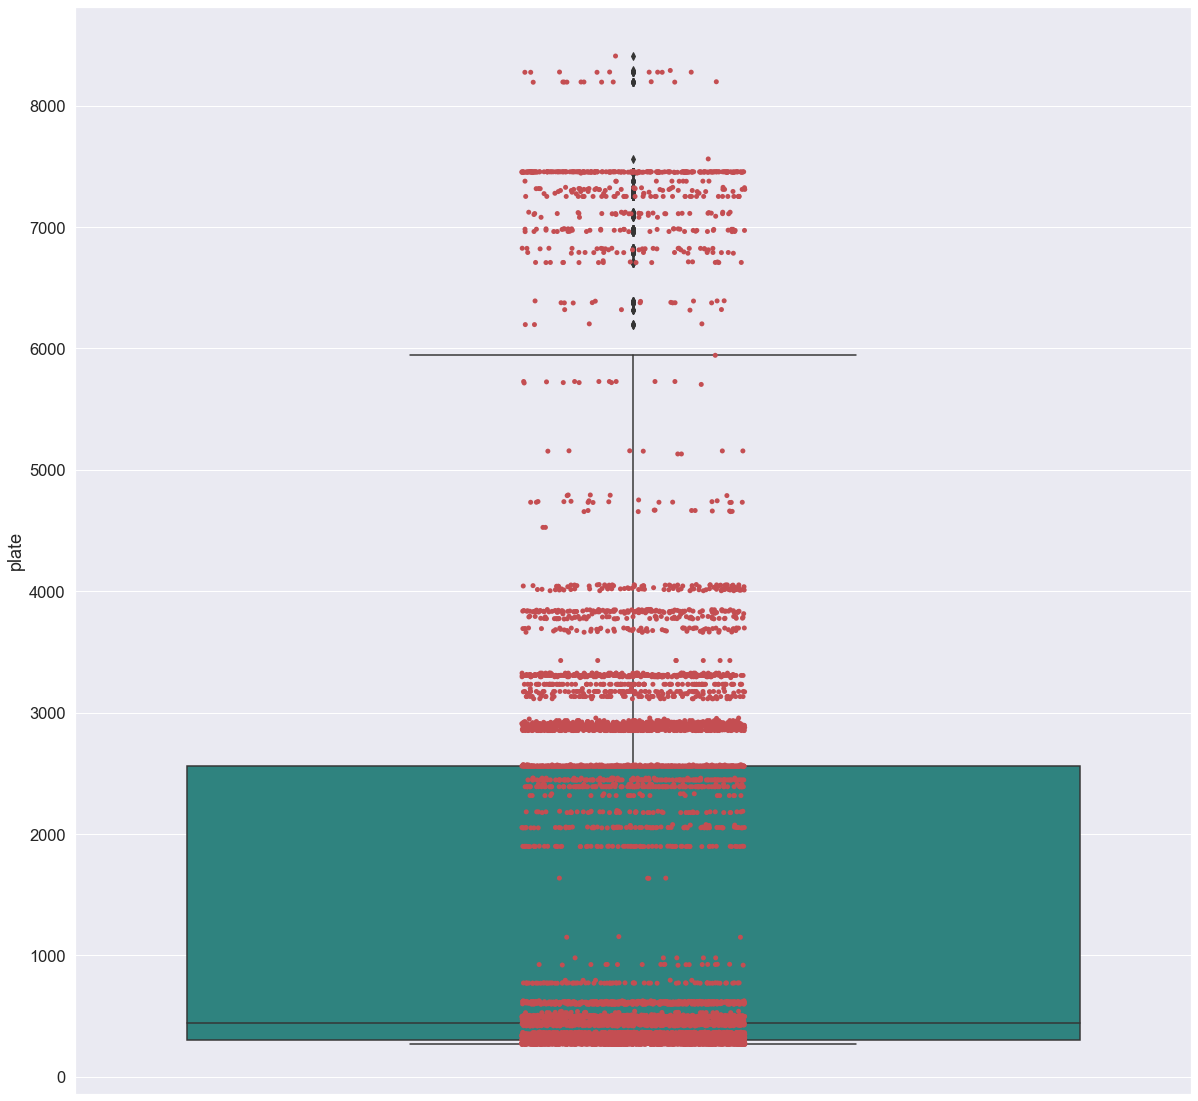

In [88]:
# detect outliers values in plate feature ::

sns.boxplot  (y = "plate" , data = df , palette="viridis")
sns.stripplot(y = "plate" , data = df , color = "r")

<AxesSubplot:ylabel='redshift'>

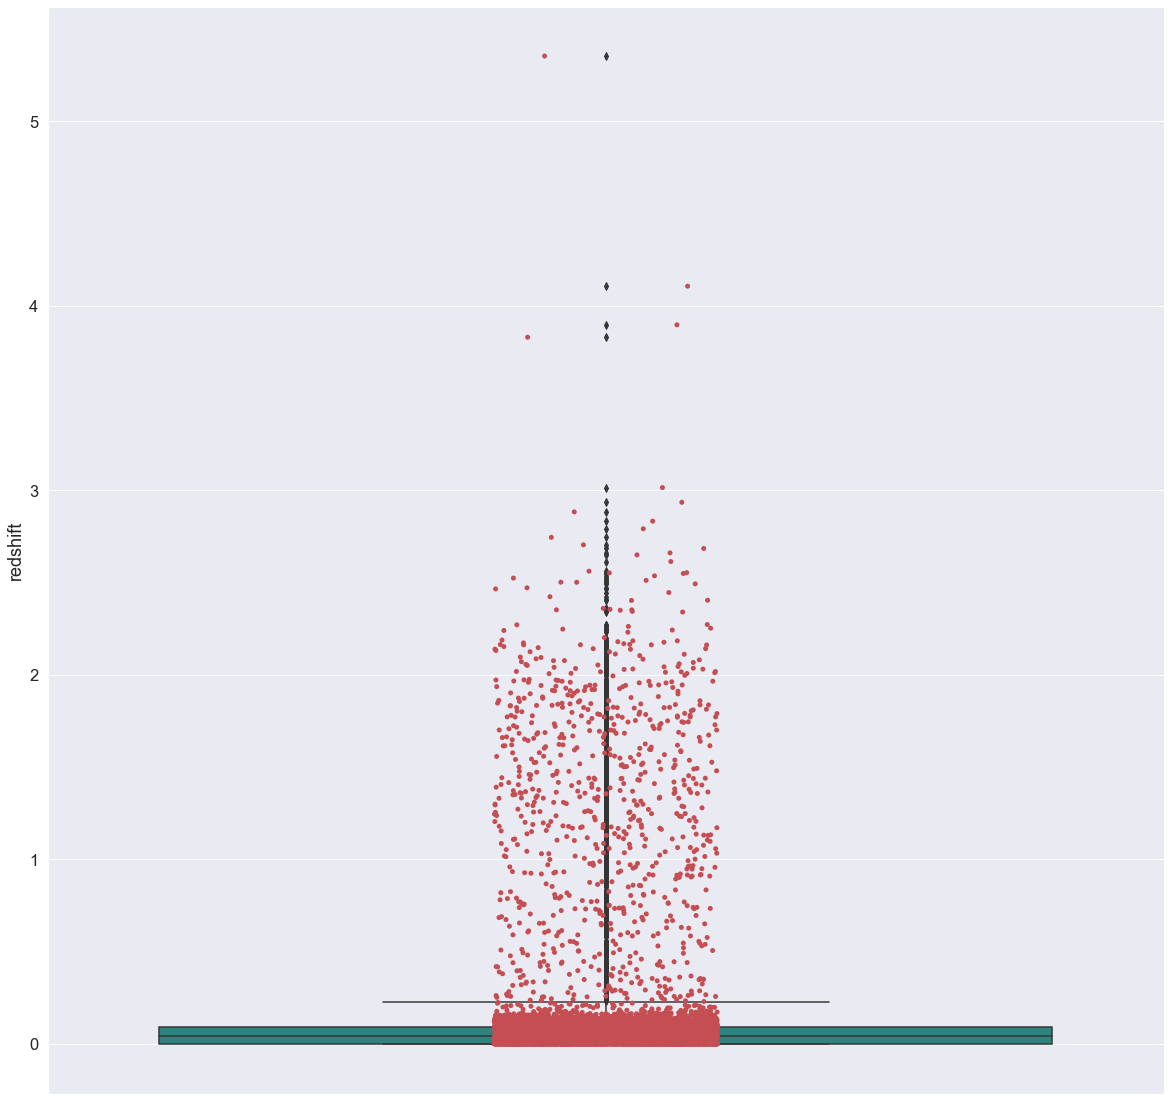

In [89]:
# detect outliers values in redshift feature ::

sns.boxplot  (y = "redshift" , data = df , palette="viridis")
sns.stripplot(y = "redshift" , data = df , color = "r")

<AxesSubplot:ylabel='specobjid'>

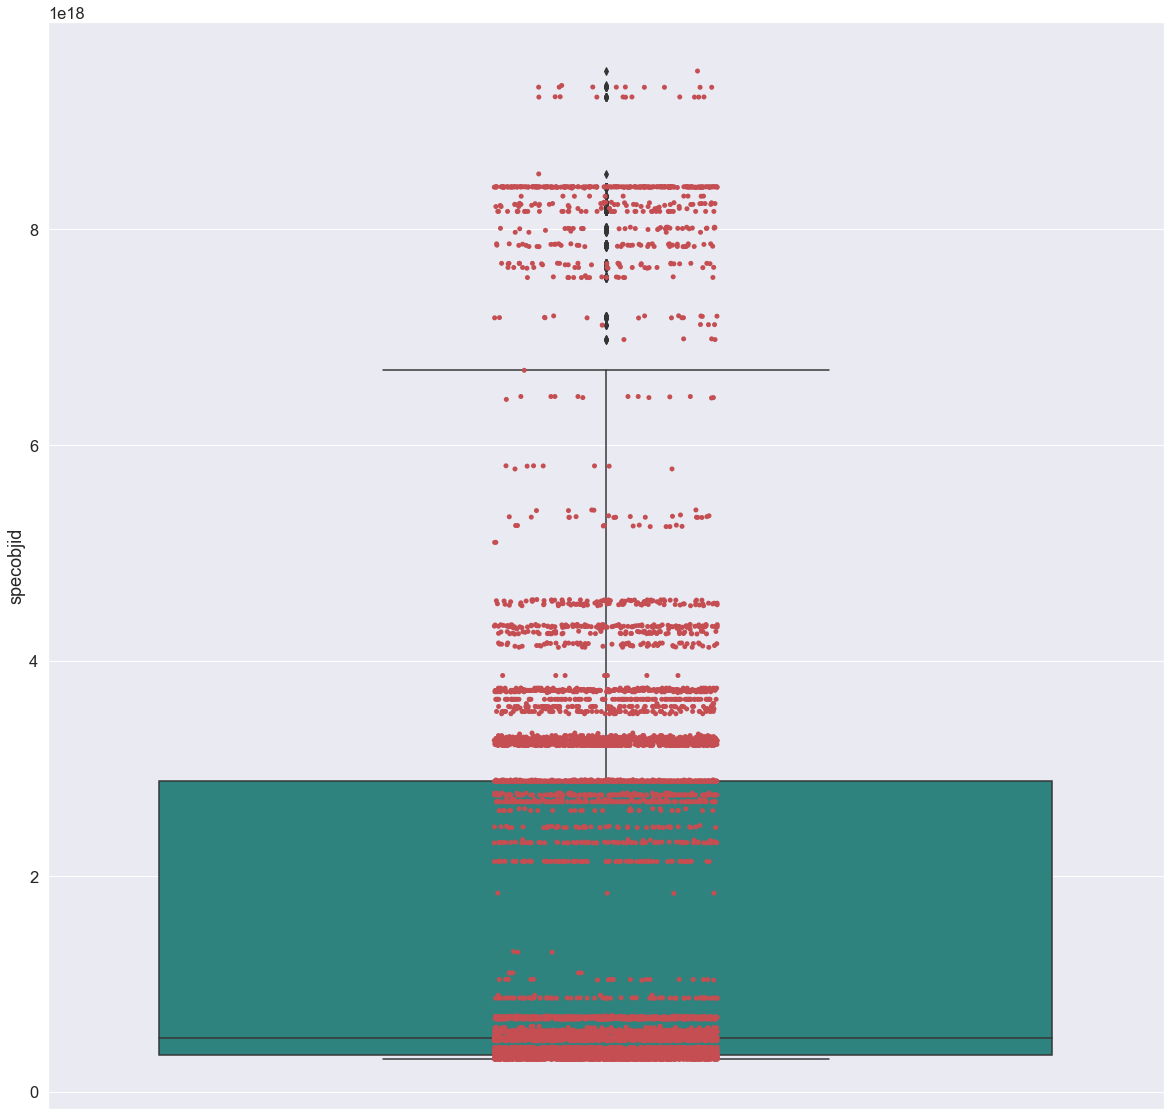

In [90]:
# detect outliers values in specobjid feature ::

sns.boxplot  (y = "specobjid" , data = df , palette="viridis")
sns.stripplot(y = "specobjid" , data = df , color = "r")

<AxesSubplot:ylabel='field'>

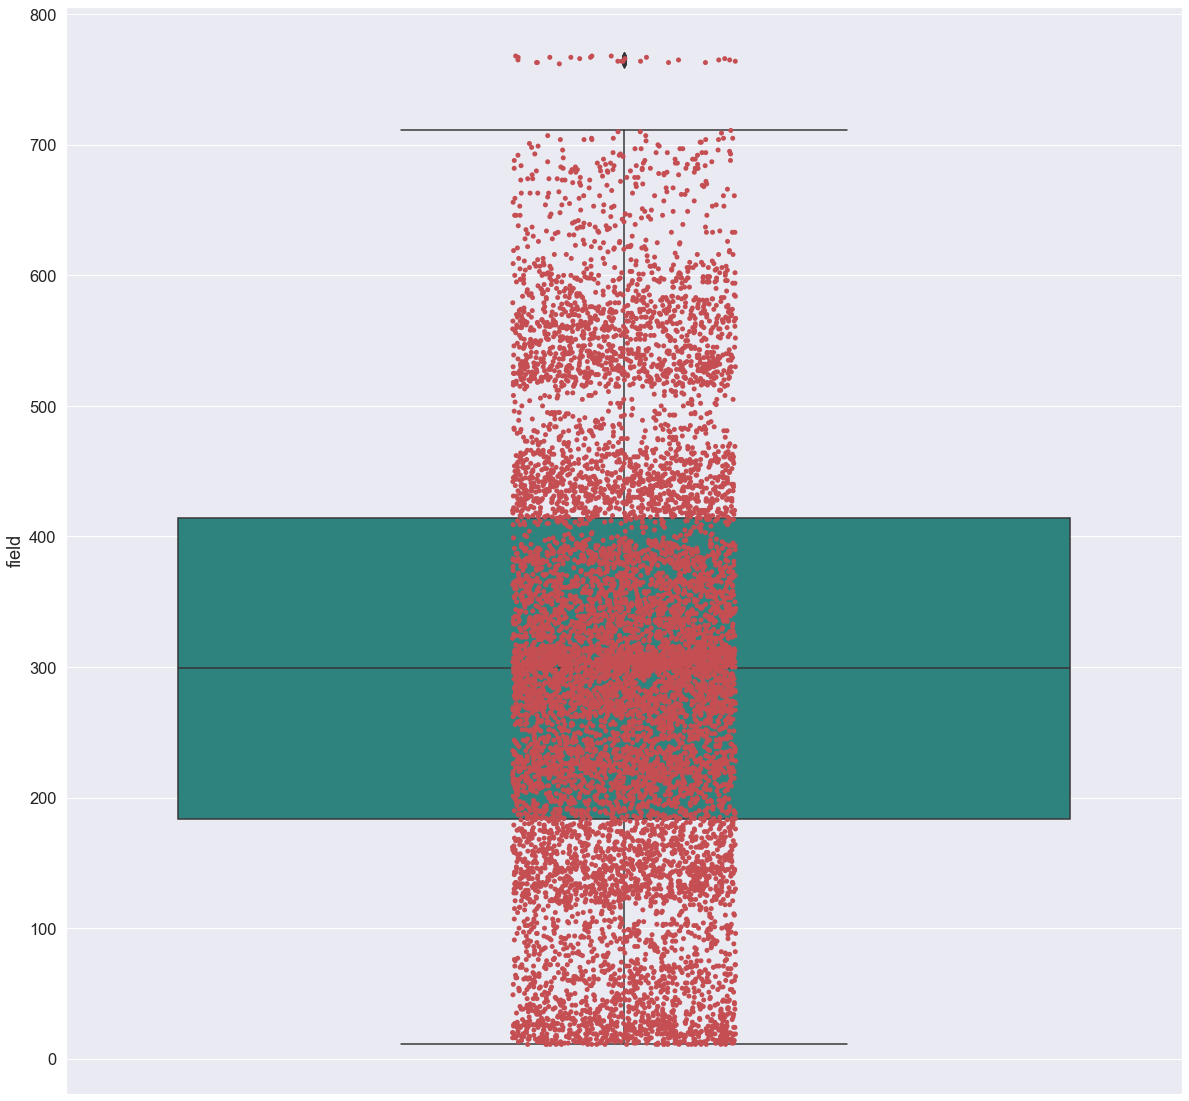

In [91]:
# detect outliers values in field feature ::

sns.boxplot  (y = "field" , data = df , palette="viridis")
sns.stripplot(y = "field" , data = df , color = "r")

<AxesSubplot:ylabel='camcol'>

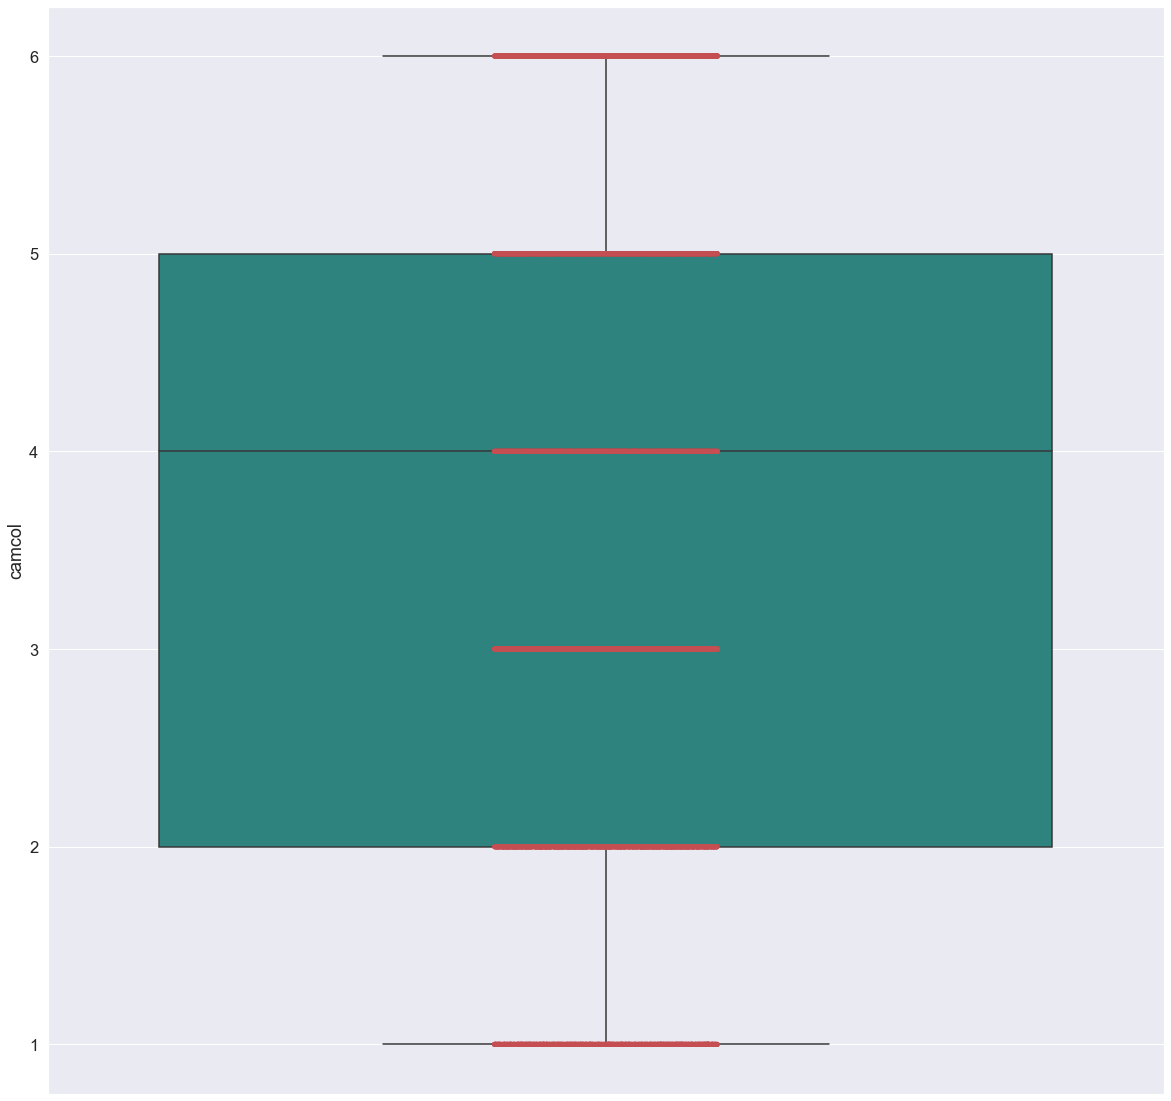

In [92]:
# detect outliers values in camcol feature ::

sns.boxplot  (y = "camcol" , data = df , palette="viridis")
sns.stripplot(y = "camcol" , data = df , color = "r")

<AxesSubplot:ylabel='rerun'>

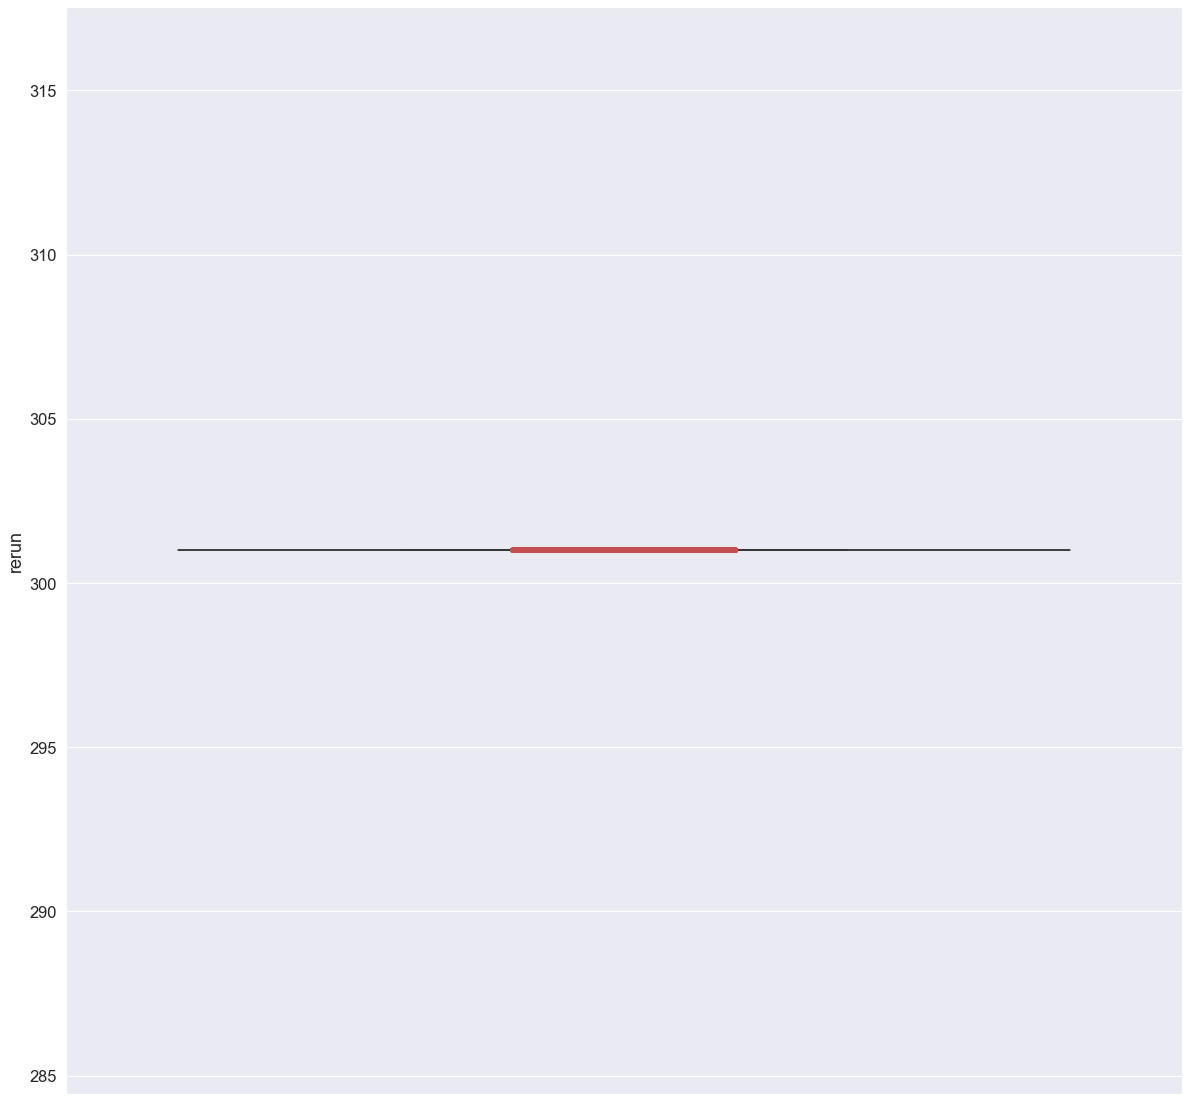

In [93]:
# detect outliers values in rerun feature ::

sns.boxplot  (y = "rerun" , data = df , palette="viridis")
sns.stripplot(y = "rerun" , data = df , color = "r")

<AxesSubplot:ylabel='run'>

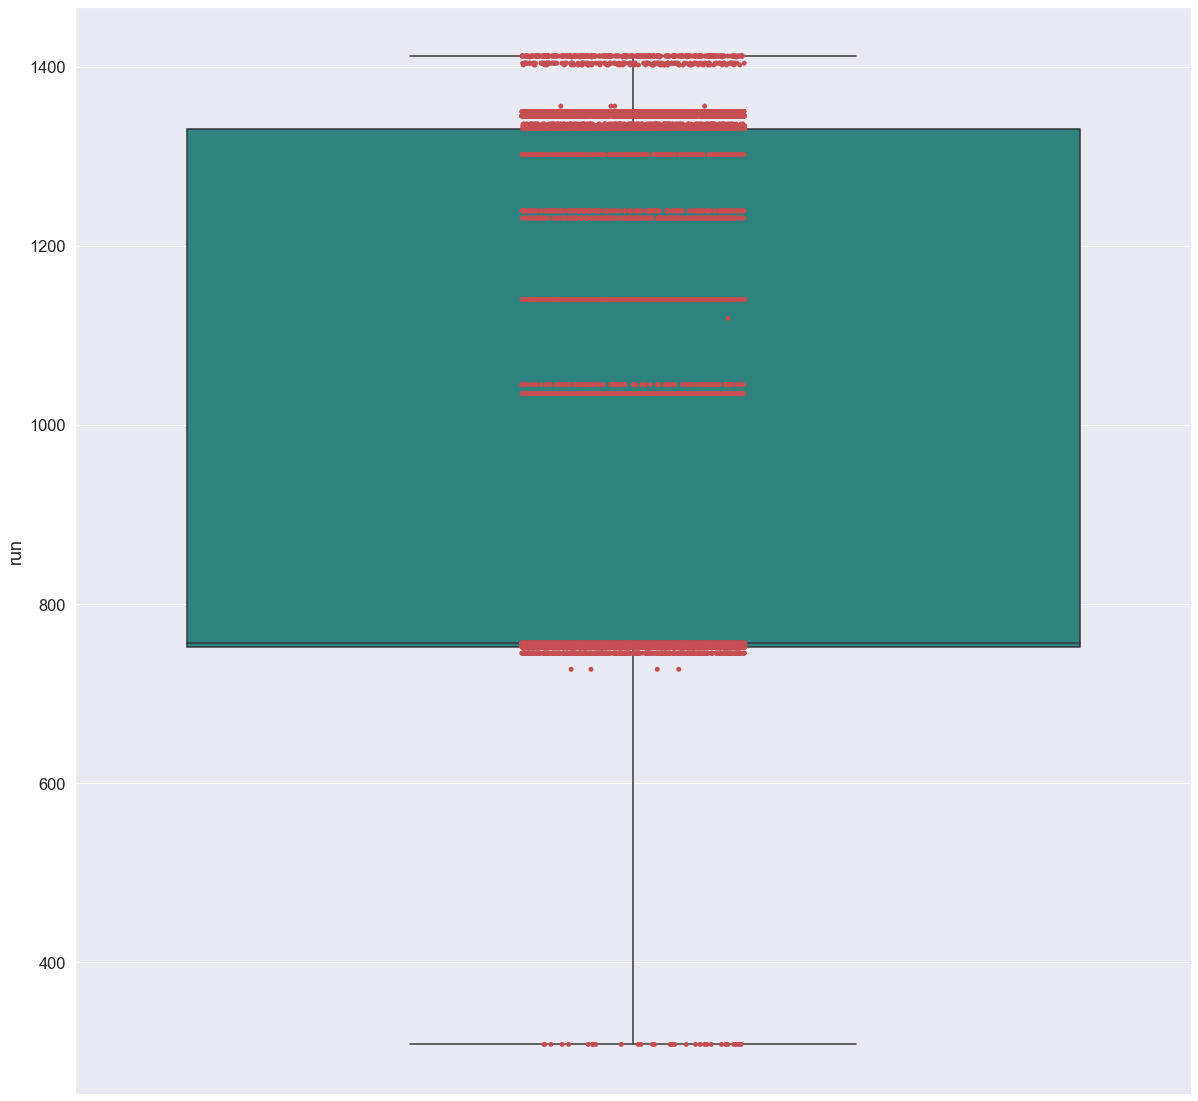

In [94]:
# detect outliers values in run feature ::

sns.boxplot  (y = "run" , data = df , palette="viridis")
sns.stripplot(y = "run" , data = df , color = "r")

<AxesSubplot:ylabel='dec'>

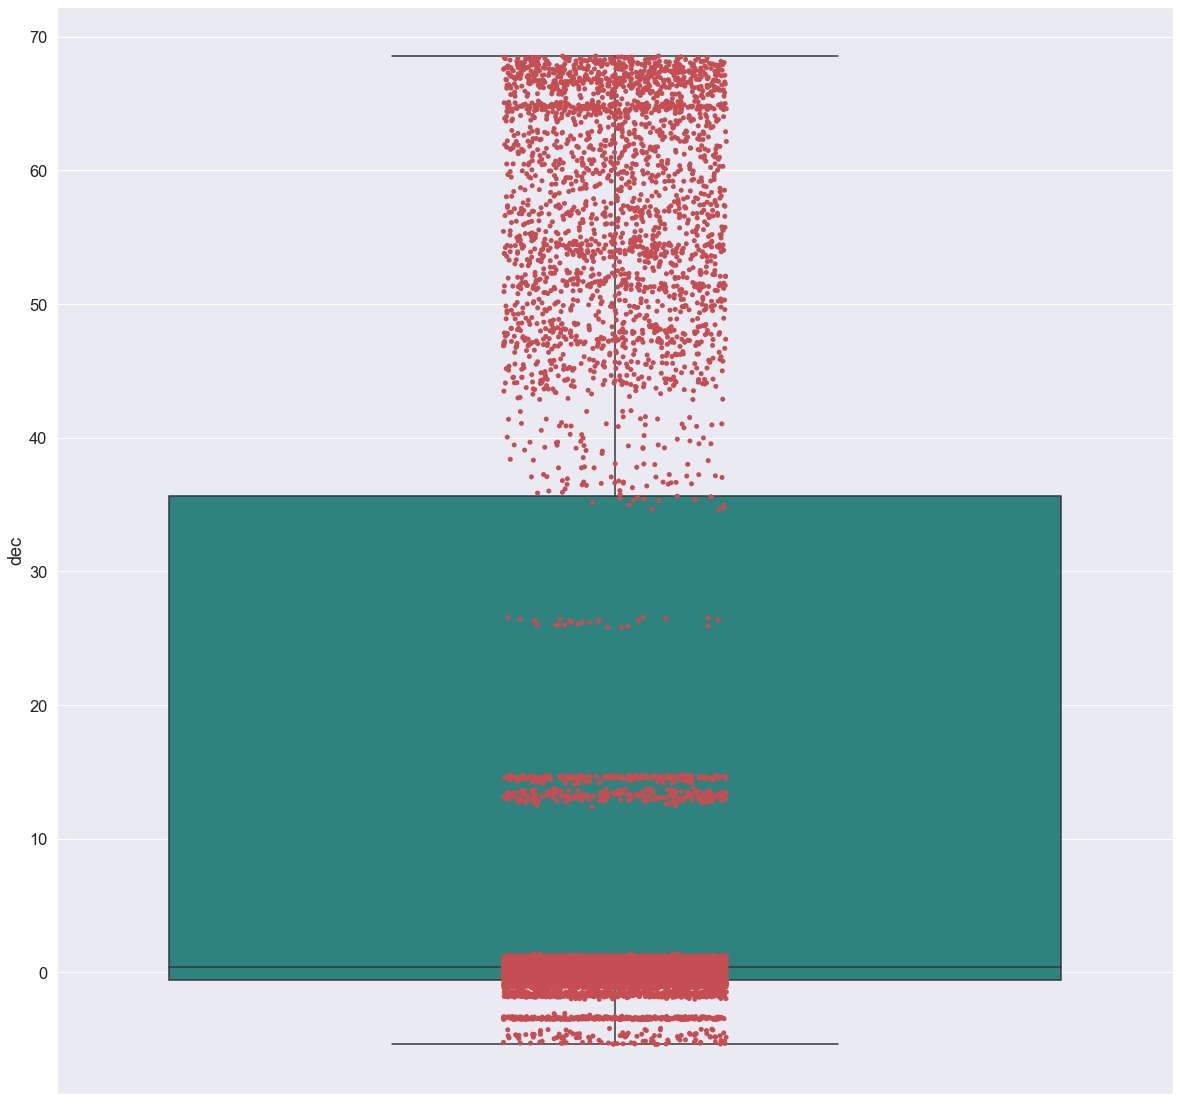

In [95]:
# detect outliers values in dec feature ::

sns.boxplot  (y = "dec" , data = df , palette="viridis")
sns.stripplot(y = "dec" , data = df , color = "r")

<AxesSubplot:ylabel='ra'>

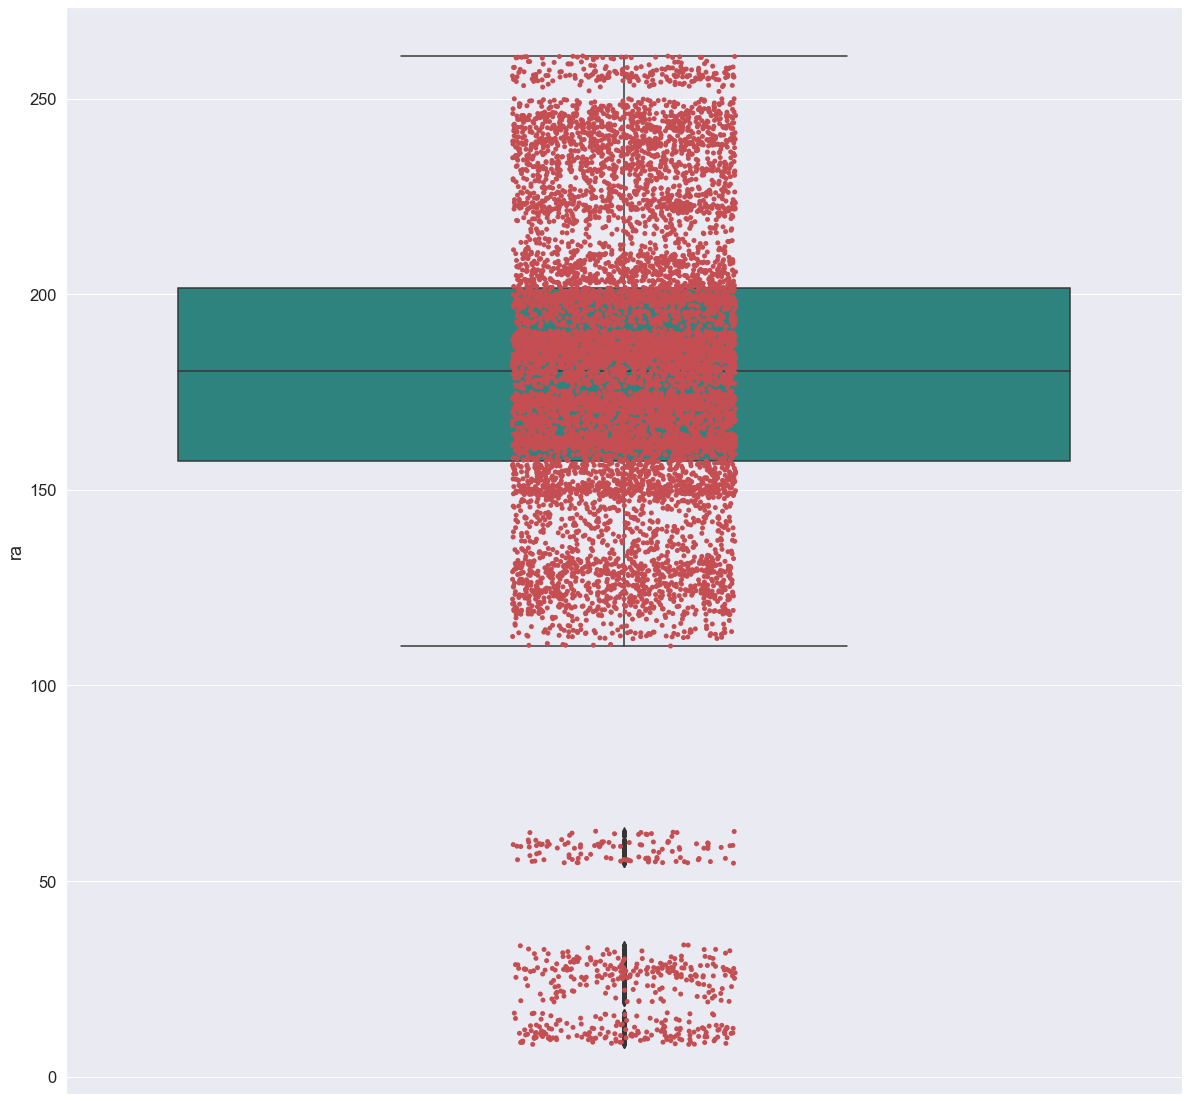

In [96]:
# detect outliers values in ra feature ::

sns.boxplot  (y = "ra" , data = df , palette="viridis")
sns.stripplot(y = "ra" , data = df , color = "r")

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.


In [97]:
df

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

In [98]:
df["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [99]:
def sky_class(x) :
    if x == "GALAXY" :
        return 1
    elif x == "STAR" :
        return 2
    else :
        return 3
    
df["class"] = df["class"].apply(sky_class)

In [100]:
df["class"].value_counts()

1    4998
2    4152
3     850
Name: class, dtype: int64

In [101]:
# creating dummy variables for categorical features
df = pd.get_dummies(df,drop_first=True)

In [102]:
df

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid  class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18      2   
1     16.48922  16.39150   752    301       4    267  3.638140e+17      2   
2     17.08732  16.80125   752    301       4    268  3.232740e+17      1   
3     15.98233  15.90438   752    301       4    269  3.722370e+18      2   
4     16.55492  16.61326   752    301       4    269  3.722370e+18      2   
...        ...       ...   ...    ...     ...    ...           ...    ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17      1   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17      1   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18      2   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17      1   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17      1   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

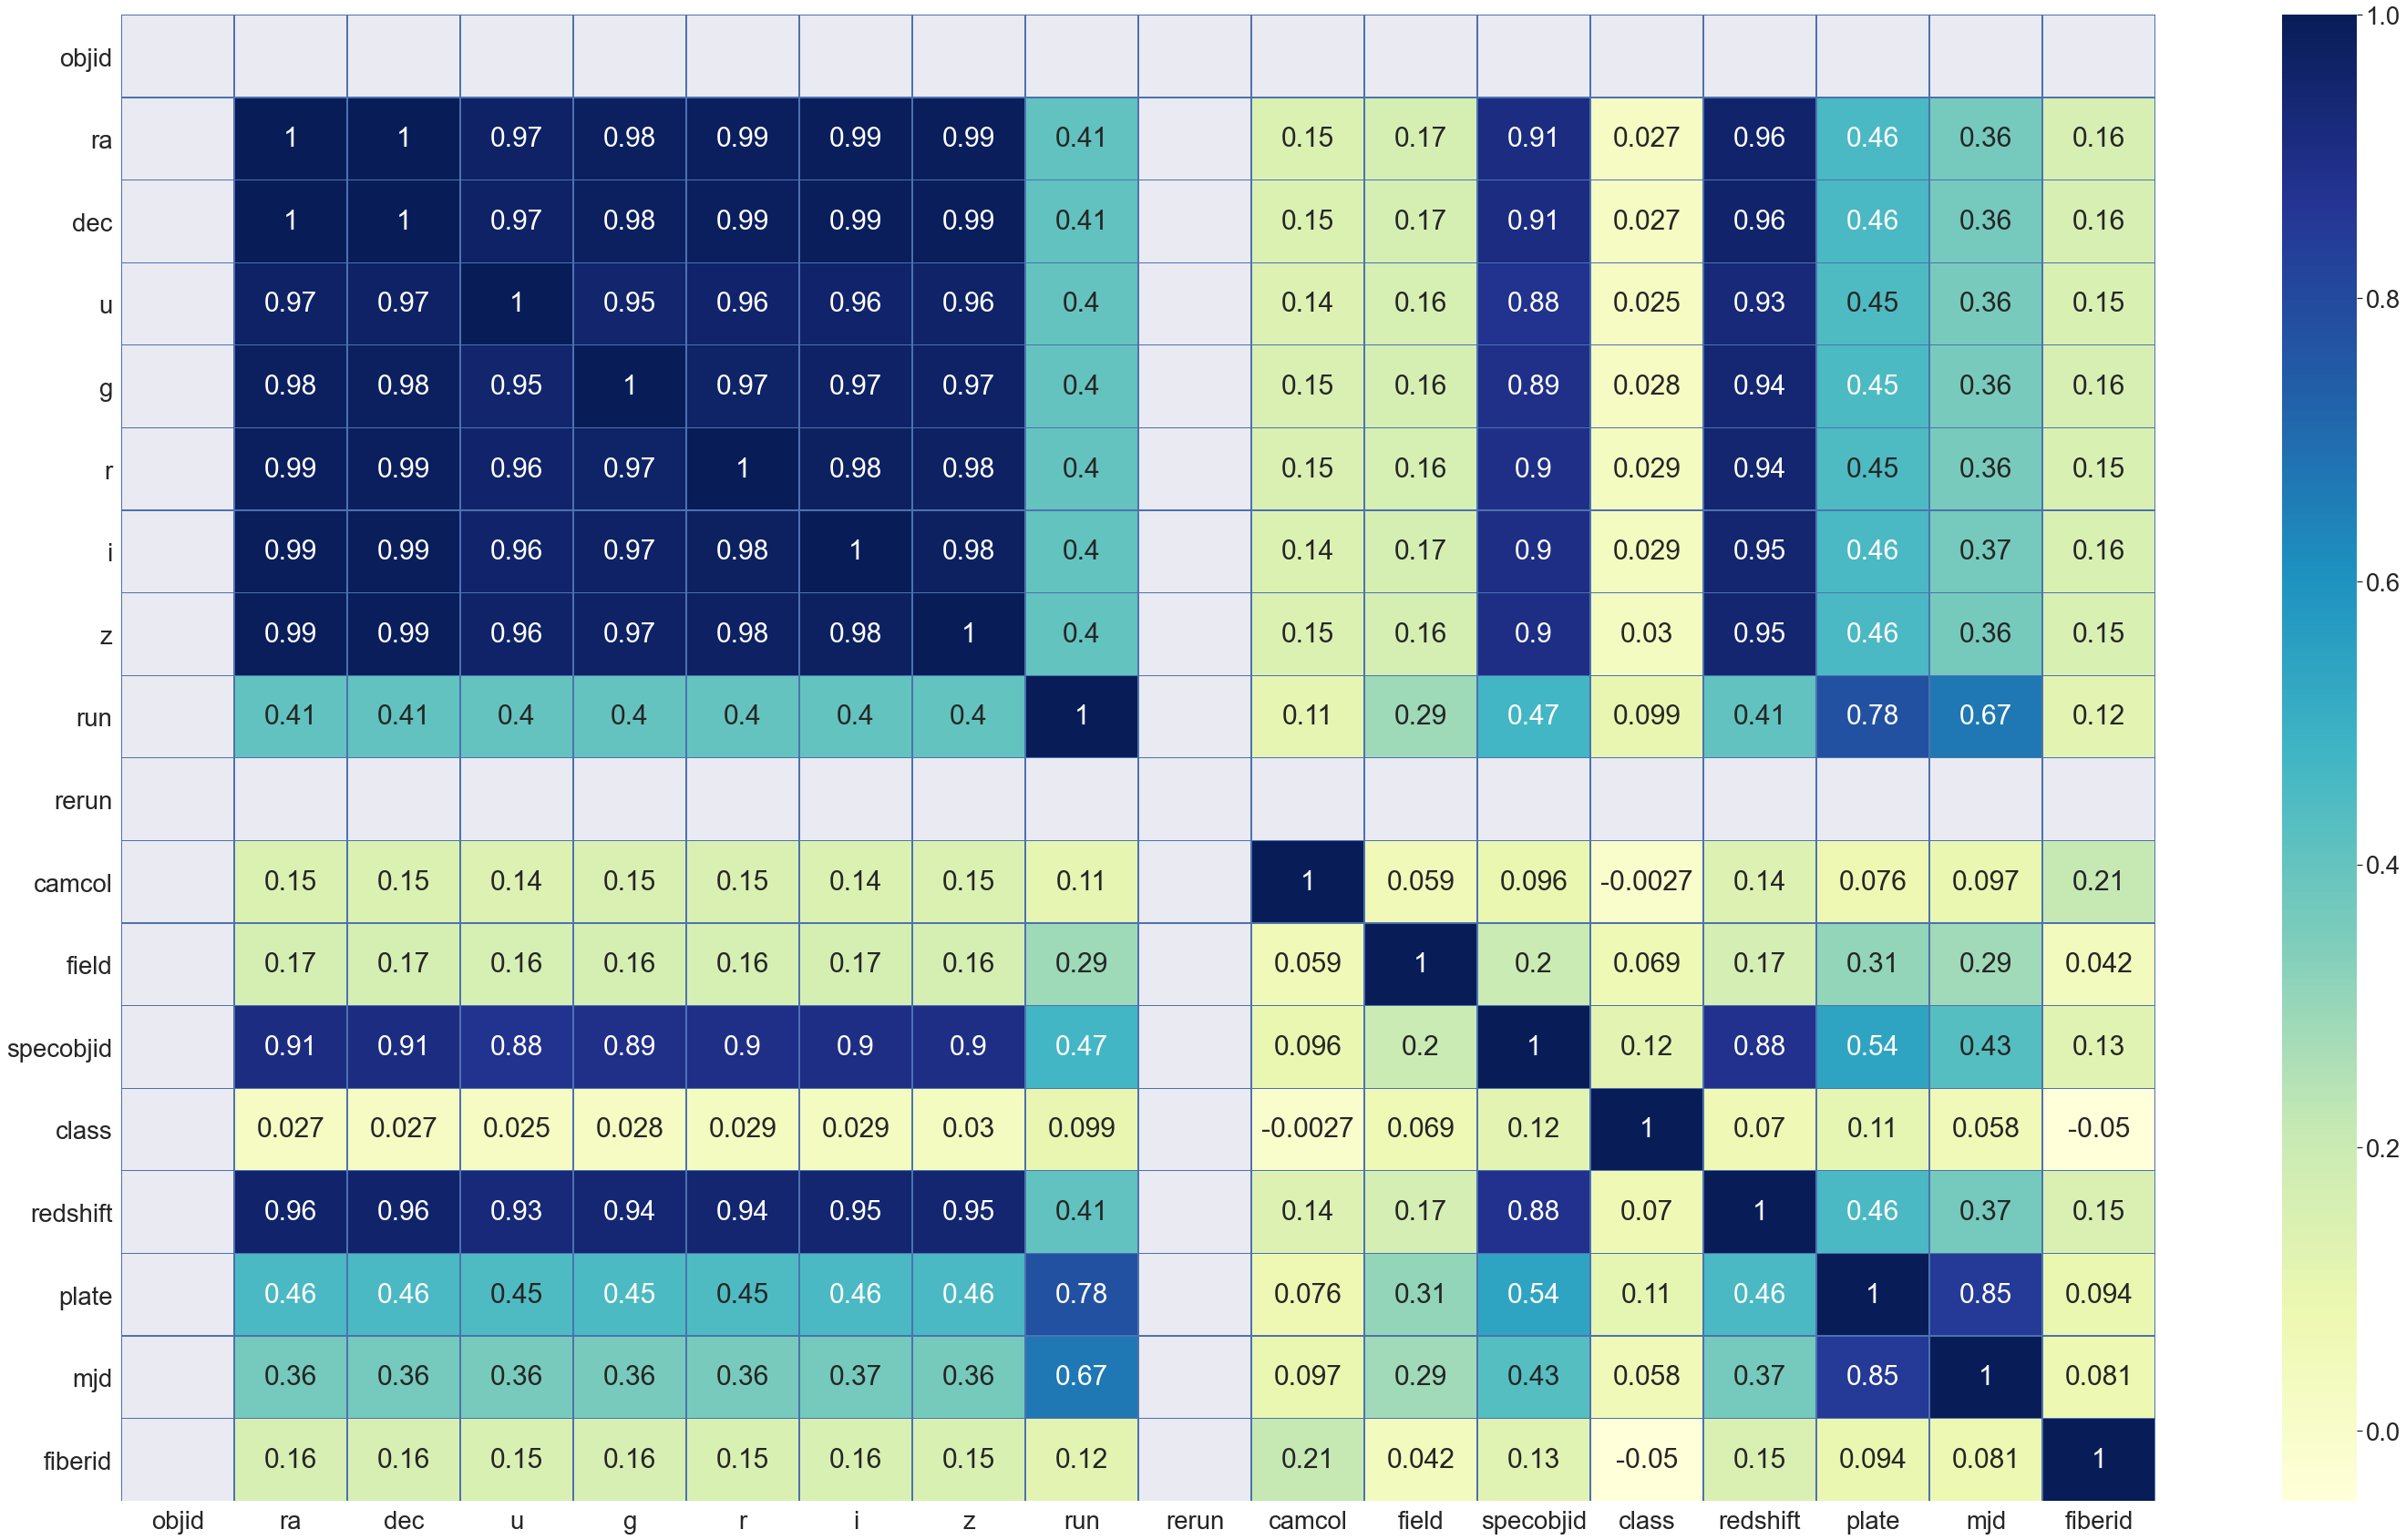

In [103]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [50 , 30]} , font_scale=2.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")

<AxesSubplot:>

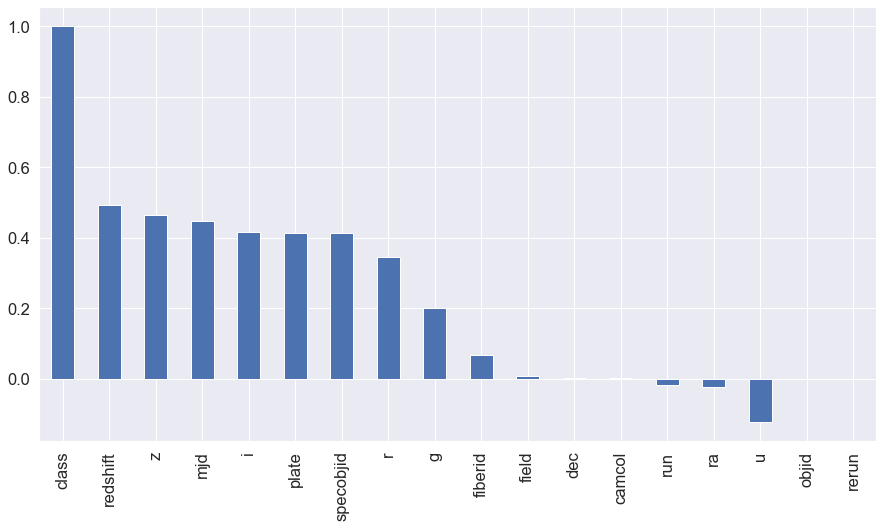

In [104]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=1.5)

plt.figure(figsize=(15,8))
df.corr()['class'].sort_values(ascending = False).plot(kind='bar'  )

# 3 :: Feture selection ::
***************************************************
* There are multi technices to get the most Correlation Columns with our target.
    * The object id columns, they are of no use in the analysis so we will delete them from dataset


In [105]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [107]:
# drop the object id columns, they are of no use in the analysis
df.drop(['objid','specobjid' , "rerun"], axis=1, inplace=True)

<p id = "Prepration">Data-Prepration</p>

In [108]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'class',
       'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [109]:
# Split data into input and output data
x = df.drop("class" , axis=1 )
y = df["class"]

In [110]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [111]:
#Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   camcol    10000 non-null  int64  
 9   field     10000 non-null  int64  
 10  class     10000 non-null  int64  
 11  redshift  10000 non-null  float64
 12  plate     10000 non-null  int64  
 13  mjd       10000 non-null  int64  
 14  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 1.2 MB


<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [113]:
# Import All Classification Algos ::
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import classification_report , f1_score , precision_recall_curve

In [114]:
Models = {"Log_Classifer" : LogisticRegression() ,
          "DT_Classifer"  : DecisionTreeClassifier() ,
          "RF_Classifer"  : RandomForestClassifier() ,
          "XGB_Classifer" : XGBClassifier() ,
          "SVC_Classifer" : SVC(),
          "GassianNB_Classifiier" : GaussianNB() ,
          "KNN_Classifier" : KNeighborsClassifier()
         }

In [115]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}\n----------")
    Model.fit(x_train , y_train)
    Train_score = Model.score(x_train , y_train)
    Test_score  = Model.score(x_test , y_test)
    y_pred = Model.predict(x_test)
    Acurace_Score = accuracy_score(y_test , y_pred)
    Con_Matrix = confusion_matrix(y_test , y_pred)
    print(f"The Traing_Score :: {Train_score}\nThe Testing_Score :: {Test_score}\nThe Accuracy_Scor :: {Acurace_Score}\nThe Con_Matrix ::\n {Con_Matrix}\n=================\n=================")

The Model :: Log_Classifer
----------
The Traing_Score :: 0.97775
The Testing_Score :: 0.9725
The Accuracy_Scor :: 0.9725
The Con_Matrix ::
 [[957  33   3]
 [  6 822   0]
 [ 13   0 166]]
The Model :: DT_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.985
The Accuracy_Scor :: 0.985
The Con_Matrix ::
 [[977   0  16]
 [  2 826   0]
 [ 12   0 167]]
The Model :: RF_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.9905
The Accuracy_Scor :: 0.9905
The Con_Matrix ::
 [[984   4   5]
 [  0 828   0]
 [ 10   0 169]]
The Model :: XGB_Classifer
----------
[22:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Traing_Score :: 1.0
The Testing_Score :: 0.992
The Accuracy_Scor :: 0.992
The Con_Matrix ::
 [[988

* Select most efficient model with high Performance and accuracy

In [116]:
Logistic_Model = LogisticRegression()
Logistic_Model.fit(x_train , y_train)
print(Logistic_Model.score(x_train , y_train))
print(Logistic_Model.score(x_test , y_test))
print("-" * 80)

0.97775
0.9725
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [117]:
Logistic_Model.score(x_train , y_train)

0.97775

In [118]:
Logistic_Model.score(x_test , y_test)

0.9725

In [119]:
Ac_Sore_RF = accuracy_score(y_test , y_pred)
Ac_Sore_RF

0.9035

In [120]:
con_Matrix = confusion_matrix(y_test , y_pred)
con_Matrix

array([[938,  55,   0],
       [116, 712,   0],
       [ 18,   4, 157]], dtype=int64)

<AxesSubplot:>

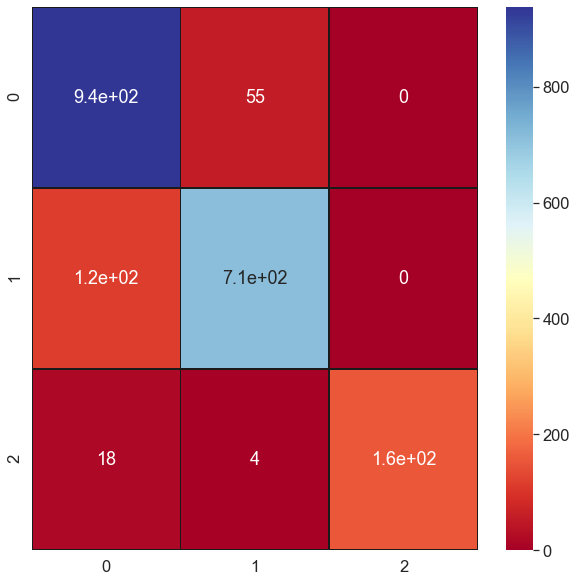

In [121]:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

sns.heatmap(con_Matrix , annot = True , cmap="RdYlBu" , linecolor = 'k' , linewidths= 1)

<p id = "Save">Save_Model</p>

# Save techinces ::
***************************************
* Save Scaler
* Save PCA
* Save Model

In [122]:
import joblib

In [123]:
scaler = joblib.dump(scaller , "scaler.h5")

In [124]:
Model = joblib.dump(Logistic_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict Sloan-Digital-Sky-Survey Class.

In [125]:
df.head(2)

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   

   run  camcol  field  class  redshift  plate    mjd  fiberid  
0  752       4    267      2 -0.000009   3306  54922      491  
1  752       4    267      2 -0.000055    323  51615      541

In [126]:
x.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [127]:
len(x.columns)

14

In [128]:
custom_data = np.array([183.53 , 0.0896 , 19.474 , 17.042 , 15.946 , 15.225 ,
                        15.225 , 752 , 4 , 267 , -0.000009 , 3306 , 54922 , 491])

In [129]:
custom_data.shape

(14,)

In [130]:
len(custom_data)

14

In [131]:
custom_data = scaller.transform([custom_data])
custom_data

array([[ 0.17176957, -0.58898407,  1.02664061, -0.3478066 , -0.8348984 ,
        -1.18663857, -0.99170701, -0.84192129,  0.20844815, -0.2144163 ,
        -0.36800522,  1.03241855,  1.31096423,  0.66855113]])

In [132]:
prediction = Logistic_Model.predict(custom_data)
prediction

array([2], dtype=int64)